In [1]:
import re
import string 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import pickle5 as pickle
import scipy.sparse
from nltk import *
#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns =['tag', 'id', 'date', 'Query','name','text']
#df.head()

In [3]:
df = df.sample(10000)

In [4]:
df = df[["tag", "id", "name","text"]]
#df.head()

In [5]:
df.shape

(10000, 4)

In [6]:
df['text'] = df['text'].str.strip().str.lower()
#df.head()

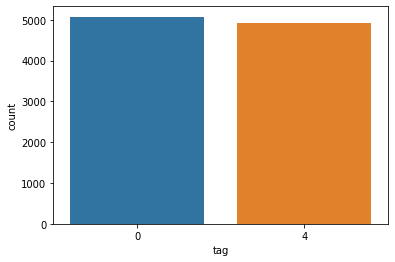

In [7]:
sns.countplot(data = df , x = "tag")

In [8]:
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs and value
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

In [9]:
df["text"] = df["text"].apply(clean_text)

In [10]:
df["tag"] = df["tag"].apply(str) 

In [11]:
df = df[ ~(df["text"] =="")]

In [12]:
df.shape

(9981, 4)

In [13]:
  >>> import nltk
  #>>> nltk.download('wordnet')

In [14]:
lem = WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist= []
    token = sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)

In [15]:
df["text"] = df["text"].apply(tokenize_lem)

In [16]:
columns_titles = ["text","tag"]
df=df.reindex(columns=columns_titles)

In [17]:
df["tag"]  = df["tag"].replace("4","positive")
df["tag"]  = df["tag"].replace("0","negative")

In [18]:
#df.head()

In [19]:
pos_df = df[df['tag'] == 'positive']

In [20]:
neg_df = df[df['tag'] == 'negative']

In [21]:
pos_records = pos_df.to_records(index=False)
pos_result = list(pos_records)

In [22]:
pos_result

[('just woke up im tired', 'positive'),
 ('but unit is fun', 'positive'),
 ('narcissism at it best but i dont deny i read this article rather carefully be more photogenic', 'positive'),
 ('six flag wa fun yesterday had lot of fun thanks to the peep that made it possible', 'positive'),
 ('wow i had a ton of lego a a kid some of it is still in my aunt basement', 'positive'),
 ('were all waiting for you and the kettle on', 'positive'),
 ('nyea well if i do well then im free im contemplating a year off studying after this hahah thanks babe you too take care', 'positive'),
 ('on my way work smile on my face sun is shining in amsterdam finaly', 'positive'),
 ('gmorning mister noodle how are you only on for a minute last night did some quality studio time always a good thing', 'positive'),
 ('dude im pumped ill only be living a few block from you countdown week', 'positive'),
 ('good morning twitterverse on my way to work and way too early but had to stop and say hi', 'positive'),
 ('in malib

In [23]:
neg_records = neg_df.to_records(index=False)
neg_result = list(neg_records)

In [24]:
tweets = []

In [25]:
for (words, sentiment) in neg_result + pos_result:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

#test_tweets = lists_from_csv

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words += words
    return all_words

all_words = get_words_in_tweets(tweets)

def get_word_features(wordlist):
    wordlist = FreqDist(wordlist)
    # word_features = wordlist.keys() # careful here
    word_features = [w for (w, c) in wordlist.most_common(2000)] #use most_common() if you want to select the most frequent words
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

training_set = [(extract_features(d), c) for (d,c) in tweets]

classifier = NaiveBayesClassifier.train(training_set)


In [26]:
classifier.show_most_informative_features(20)

Most Informative Features
       contains(welcome) = True           positi : negati =     21.2 : 1.0
          contains(hurt) = True           negati : positi =     18.4 : 1.0
          contains(died) = True           negati : positi =     17.1 : 1.0
       contains(stomach) = True           negati : positi =     13.9 : 1.0
        contains(loving) = True           positi : negati =     13.4 : 1.0
       contains(missing) = True           negati : positi =     12.6 : 1.0
           contains(sad) = True           negati : positi =     10.6 : 1.0
         contains(worst) = True           negati : positi =     10.3 : 1.0
         contains(shame) = True           negati : positi =      9.4 : 1.0
        contains(moving) = True           negati : positi =      9.4 : 1.0
           contains(rip) = True           negati : positi =      9.4 : 1.0
          contains(shoe) = True           positi : negati =      9.3 : 1.0
          contains(poor) = True           negati : positi =      9.2 : 1.0

In [27]:
test_tweets = pd.read_csv('allM1Tweets.csv')

In [28]:
test_tweets.head()

,user_name,user_id,text
0,TwiMeta,56161646,Mac Studio's M1 Ultra Chip Outperforms on Comp...
1,Africanmind7,1273728531227447296,RT @iDropNews: Trace won an iPad Air (M1) from...
2,menter_latonia,1378412854223773706,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ..."
3,astro_peca,1298396509420093440,NOTHING is working on the M1 mac processor. Or...
4,jeffbenton78,780377304589488128,"RT @ForbesTech: Forget The New MacBook Pro, Ap..."


In [29]:
test_tweets_list = test_tweets['text'].tolist()

In [30]:
for t in test_tweets_list:
    # print "{0} : {1}".format(t, classifier.classify(extract_features(t.split())))
    print ("{0} : {1}".format(t, classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))))

Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks https://t.co/lZT6pYAMTB : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Check out Apple MacBook Pro 14.2" M1 Pro Chip 16GB 512GB Space Gray MKGP3LL/A 2021 Model by XanaduFashions on Store… https://t.co/r7ETzWNYbq : positive
NOTHING is working on the M1 mac processor. Or, to make it working, you have to manually fix things. I want a Linux machine. @Apple : negative
RT @ForbesTech: Forget The New MacBook Pro, Apple Has Something Better https://t.co/3z6WGYeBES https://t.co/eSRjxGznQr : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @joelvarty: PSA: to anyone trying to use the @elgato CamLink 4k on a MacBook with Apple Silicon/M1 chip.  If you’re having problems with… : negative
Ma

However, as things evolve, my inability to just drop myself somewhere and be productive has started to become a not… https://t.co/otF0sQLGK1 : negative
"ad:' Apple 2021 MacBook Pro 16-inch M1 Max, 64GB, 2TB Excellent Condition - https://t.co/jX0RAquplm https://t.co/gDuVfnE9Q2 : negative
Oh God, Apple MacBook Pro 16” M1 has the best speaker EVAHHHHH !!! But I can’t afford it 😭😭😭 : negative
Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks - Slashdot https://t.co/MNB8ZZFEcV : negative
RT @EricBerzins: Happy that a FW device (744T) can still connect to a '22 M1 Mac thanks to OWC TB3 Dock w/ FW800 + FW 800 to 400 cable. Wou… : positive
RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13 inches I| 8gb ram I| 256ssd I| Retina display Il Touch Bar and Touch ID | 20… : negative
RT @igor_os777: Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks https://t.co/2Q4Vqirp18 : negative
Mac Studio's M1 Ultra Chip Outperforms on C

"ad:' Apple MacBook Pro 14.2" M1 Pro Chip 16GB 1TB Silver MKGT3LL/A 2021 Model - https://t.co/YWJmGgRHpR https://t.co/bI8q1vkpW5 : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
16-inch M1 Pro MacBook Pros on sale for up to $100 off MSRP at #Amazon =&gt; https://t.co/LJH7ZNU4Aa : negative
I think Apple should make the 16GB M1 chips the base unit for M1 Macs. Use the 8GB chips for iOS devices. : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
12" iPad Pros with M1 C

RT @hudson_chatbots: Apple's 12.9-inch iPad Pro M1 falls to a new all-time low price of $950: #artificialintelligence #iot MT: @Mikequindaz… : negative
Since @PrehistoricK is out, I decided to give a chance to @NVIDIAGeForce NOW. It actually works decently. Pity the… https://t.co/nohcJ0IKjY : negative
RT @hudson_chatbots: Apple's 12.9-inch iPad Pro M1 falls to a new all-time low price of $950: #artificialintelligence #iot MT: @Mikequindaz… : negative
RT @tomshardware: Nvidia Rolls out Apple M1 Native GeForce Now Support https://t.co/aTJ7XvqBzv https://t.co/zKbh7HAuI5 : positive
I have little love for Meta/Apple but I am quite interested to see how the new VR/AR headsets (especially with M1 c… https://t.co/hJKR2wXznf : positive
RT @hudson_chatbots: Apple's 12.9-inch iPad Pro M1 falls to a new all-time low price of $950: #artificialintelligence #iot MT: @Mikequindaz… : negative
@Apple @AppleSupport I ordered a Macbook pro M1 max on march 25th. delivery date was May 4-11 (which it was not

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
[Forum Topic] WIll Acapela work on the latest m1 Pro processors? https://t.co/TRu6w4Xmb4 : negative
RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13 inches I| 8gb ram I| 256ssd I| Retina display Il Touch Bar and Touch ID | 20… : negative
Here's when Qualcomm's answer to Apple's M1 chipset https://t.co/m2Qop4rwqv https://t.co/TOODRMDZoJ : positive
Here's when Qualcomm's answer to Apple's M1 chipset

https://t.co/va7vuKqtW7 : positive
RT @SlashPolygon: Moved from Unity 2020 to Unity 2021 LTS. Thanks for the support of Apple Silicon! Redesigned the lighting in Tavern Brawl… : positive
@Leon_C haha design. Apple M1! : positive
Here's when Qualcomm's answer to Apple's M1 chipset

https://t.co/twg3L5MjgS : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core nev

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@MacSourcePorts
"With the Microsoft-Qualcomm ARM exclusivity deal ending very soon, Microsoft could make Windows 11… https://t.co/nlTVMhCcTR : negative
Get a 13″ M1 MacBook Pro with 16GB of RAM today at Apple for up to $350 off MSRP https://t.co/5DQvpHidbU https://t.co/cyXwRFkl31 : negative
Elevate your productivity with all the features of Y-Master MS5.

📌 Y-Master MS5
🔗 https://t.co/5onrASGvGK
.
.
.… https://t.co/APPdZcniSg : positive
eMac, the most vanilla of Macs since Jobs’ return, was the boring education-targeted sidekick to the loveable iMac… https://t.co/Kl1HJCnnNi : negative
@narayanank @fixol4all @dhanyarajendran proved your hominid class 40 IQ haven't you? Do you know what a URL shorten… https://t.co/CTQBXGNw02 : positive
@missallaneousm We went through everything on my computer. I haven’t even touched 20% of storage. I even

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Coming in about 18 months (which roughly equals never in this area of tech), Qualcomm will have an ARM processor fo… https://t.co/srhh2CSlxu : negative
RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13 inches I| 8gb ram I| 256ssd I| Retina display Il Touch Bar and Touch ID | 20… : negative
RT @dignifiedtrades: Frame 1: MacBook Pro Late 2020 | M1 || 13 inches I| 8gb ram I| 256ssd I| Retina display Il Touch Bar and Touch ID | 20… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Very nice write up of a new data leakage mechanism on modern Apple silicon, also enjoyed the @AsahiLinux reference… https://t.co/t9ddmBLZ7i : positive
“Alla that body that you came with… but where are you mentally?”  https://t.co/xW4ENRXOrn

GeForce Now adds Apple Silicon support, making it sort of possible to game on a Mac https://t.co/Pel1kM0HBs : negative
Nvidia GeForce Now, ora l’app supporta i Mac M1 https://t.co/RQcTSOmBz4 : negative
@BelkheirMahamed @ashwindollar @matteocollina Ive owned the first version of the mac with touch bar, and other than… https://t.co/q1r0uUuviU : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
After using the iPad Pro as my main computer for years, I've switched to the M1 MacBook Pro!

Here's how I set it u… https://t.co/JPH0WAr8Fr : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @arstechnica: GeForce Now adds Appl

qualcomm: Here’s when Qualcomm’s answer to Apple’s M1 processor will arrive – Times of India https://t.co/ZNyp2csytv : positive
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @Suhail: Chrome on M1 mac (Left) vs Mighty (Right): https://t.co/9tKan4XBzq : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battl… https://t.co/2bhJiA1XkC : positive
qualcomm: Here’s when Qualcomm’s answer to Apple’s M1 processor will arrive https://t.co/2YhCKWsFmU : positive
testing OBS on the m1 pro rn

i might actually be able to repla

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Apple M1 Macs: What you need to know about buying an Apple silicon Mac | TechBuzz https://t.co/nfAiriebKg : negative
Here's when Qualcomm's answer to Apple's M1 processor will arrive Qualcomm’s processors are found across smartphone… https://t.co/eZMOTkwslU : positive
Qualcomm CEO Suggests Company’s ARM-Based Apple M1 Rival Could Be Delayed, and more for 04/29/2022 - https://t.co/kMfLdMAhNc : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
@SGgrc Apple Silicon data leak at rest 😟🤷‍♂️ https://t.co/I25AfuPNyH : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon 

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
@theskyscribe Unless you have a powerful laptop I don’t see how the setup of laptop+Wacom could be better than ipad… https://t.co/GDm1OnrOvX : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @SimpliTechBlog: Qualcomm’s rival to Apple Silicon will be available for PC’s by late 2023. https://t.co/xM6rZgJibz : negative
RT @SmartykitE: Great post by @kenshirriff on Apple-1's video memory – right to the silicon! Memory used 2504V shift registers instead of D… : positive
Qualcomm’s rival to Apple Silicon will be available for PC’s by late 2023. https://t.co/xM6rZgJibz : negative
Qualcomm’s rival to Apple Silicon will be available for PC’s by late 2023. https://t.co/IAwY1ErJf4 : negative
Article of the Day: More information on th

Help! My M1 MacBook Air has been getting increasingly hot under what I would say is medium load... However, it only… https://t.co/x9WAAjhe9L : negative
Huh, interesting - the HBO iOS app is enabled for running on M1 Macs, so you can use it to watch videos on the desk… https://t.co/LbSKSljUiP : positive
@SomeGuyOnHere99 @ahaines98 @zack_farnsworth @KDPomp @jmcgonigal9 So, just because it’s leading doesn’t mean it’s b… https://t.co/SUI8QPzZny : negative
Qualcomm&amp;apos;s M1 Rival to Be Available in PCs by Late 2023  Qualcomm&amp;#039;s answer to Apple silicon will be avail… https://t.co/iuqh5NwWzw : negative
https://t.co/Oz2VCKhSSV

Remixing / Remastering is loads of fun. Give Apple's Logic a try, Abelton's Live, etc and… https://t.co/AU1pLqiGNT : positive
RT @appleinsider: Qualcomm says its Apple Silicon rival chips will be in PCs by late 2023 https://t.co/imj3cVD7qL : negative
RT @wccftech: Apple’s M1 Ultra Uses TSMC’s ‘InFO_LI’ Packaging Method, Enabling Lower Cost in Mass Producing

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Know what’s weird? Windows 10X was supposed to be the next OS… and it was supposed to “jettison Win32”, or at least… https://t.co/wvPm73aShO : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @arstechnica: While Apple Silicon Macs can’t use GeForce GPUs, they can at least run GeForce Now as of this week.
https://t.co/c17uvTj1QL : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Nvidia’s Cloud Gaming Service GeForce Now Acquires Support for Apple Silicon in New Upda

Qualcomm says its Apple Silicon rival chips will be in PCs by late 2023 https://t.co/imj3cVD7qL : negative
RT @maxandfix: ✨ Sung by iClarified, Apple is continuing the partnership that brought them the success of the M1 Chip. Components for the M… : negative
How about some morning gain porn for 1st trades on the $aapl Mac Studio M1 Ultra. Definitely scheduling some full t… https://t.co/4kZVKxCAxB : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
(iPhone iPad repair) Qualcomm CEO Suggests Company’s ARM-Based Apple M1 Rival Could Be Delayed: When Apple announce… https://t.co/D3QFBl5McG : negative
It's important to note that Qualcomm believes it can beat Apple's *M-series of chips*. Not the M1, which will be 3… https://t.co/o42d

- Another Messy… https://t.co/V0ABcOFmEo : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
New 14" M1 Pro MacBook Pros on sale for $100 off MSRP at Simply Mac, starting at $1899: https://t.co/xWFxQdgvWw : positive
SAVE $250.00 !!! 

2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with 10‑core CPU and 16‑core GPU, 16GB RAM, 5… https://t.co/7oDftLywKI : negative
@PanduhVT The best of course would be getting an iPad Pro, however it’s quite expensive for a tablet. A new iPad Ai… https://t.co/n9MSTUi2RV : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
Qualcomm CEO Suggests Company’s ARM-Based Apple M1 Rival Could Be

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
@mooreslawisdead I wonder if "Meteor Lake" E-cores &amp; P-cores could match Apple Silicon's level of battery life. : negative
2022 Mac Studio (20-core M1 Ultra) Review https://t.co/9NLkNhRt7X comm: https://t.co/Ta6oMZFKRT : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
@appleinsider OS-Design-Chipset-Applications all under one roof !

This is real good news for Apple and its future !

M1 was right ! : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
The fact that 

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
Qualcomm confirms Apple M1-killing Windows 11 laptops are coming  but is it too late? - TechRadar https://t.co/rihU7qkOnD : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
@bchesky Tim Cook @tim_cook should learn from Brian Chesky and stop harassing his Apple employees with his inflexib… https://t.co/3Ix8ekzWjs : negative
Native Apple Silicon support promises lower power use, faster startup times. https://t.co/R0OV8NhmMY : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : nega

RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @solidstatelogic: Introducing SSL 360° V1.3 update:

SSL 360° V1.3 adds new DAW Transport functionality to UF8, UC1 and the Plug-in Mixe… : positive
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
RT @dkohlbre: We found a way to leak data on Apple Silicon processors that is "at rest": that is, data the core never reads speculatively o… : negative
GeForce Now adds Apple Silicon support, making it sort of possible to game on a Mac  https://t.co/2HueU2Ojpi : negative
Me looking at all the new Apple products with the M1 chip in em. https://t.co/l6ykRS8aem : positive
@ghost_motley @TheAtlasRises @uzzi38 @SWenerski @phatal187 @JamesDSneed Wha? There's no redeeming performance benef… https://t.co/fcx7zyfAn4 : positive
RT @dkohlbre: We fou

#GeForce Now adds #Apple Silicon support, making it sort of possible to game on a #Mac #ArsTechnica… https://t.co/sSuP6OxS7e : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@kiwapebretech “There are some weird-looking purple machines here, but they’re not from Apple—some company called ‘… https://t.co/lUJ2f163jl : negative
New 16" M1 Pro MacBook Pro in stock and on sale for $200 off MSRP at Amazon: https://t.co/66hS074JWl : positive
Qualcomm confirms #Apple #M1-killing #Windows11 laptops are coming – but is it too late? https://t.co/4LUgMXC7uN by… https://t.co/PttNBj1bGj : negative
While @intel have reduced i7 to only 4 cores 😂 @Apple mac book Pro M1 is 10 core https://t.co/0heC3mnXyu : negative
RT @iCave_Dave: Apple M2 Generation performance Vs M1   A PAINFULLY Detailed discussion https://t.co/AFyysPNUEW via @YouTube : positive
RT @iDropNews: Trace won an iPad Air (M1) fr

-Sent from my M… : negative
@JetBrainsRider @rakyll @davidfowl Sure, I've been through the internal support and my case was put into youtrack b… https://t.co/A6HNTkhKoo : negative
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
RT @ucfagls: #RStats  📦 developers; is there an automatic build/check service that one could use that does the build and check on an M1 Mac… : positive
RT @deanhager: MyPOV: #Mac will one day be #1 laptop at work in US &amp; perhaps WW:

1.) Workforce getting younger;
2.) IT Consumerization, fu… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
#RStats  📦 developers; is there an automatic build/check service that one could use that does the build and check o… https://t.co/yVgDr8Ux7e : positive
Apple CEO: Silicon shortages and C-19 lockdowns to hurt sales by up to $8 billion
https://t.co/nAMR

Apple M2 Generation performance Vs M1   A PAINFULLY Detailed discussion https://t.co/AFyysPNUEW via @YouTube : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
need a new mbp workhorse but likely m2 chips coming q3. waiting seems smart to buy a discounted m1 or commit to m2… https://t.co/O5iJi2POnM : positive
RT @quantovox: Spatializer's iOS Audio Unit can now be installed on Apple Silicon (M1) Macs.
https://t.co/ZJEfRvpvAY

#auv3 #logicpro #Gara… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them

Nvidia’s GeForce NOW Cloud Gaming Service Gains Native Support for Apple Silicon-Powered Macs… https://t.co/QgZbP3THhA : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
#MacbookAir #M1 2020 - showing 2 unread messages for months when nothin unread. This is a bug. Have called… https://t.co/umlCcyjQ6P : negative
@BiscotoMarco BlueStacks is not yet supported on MAC M1, however, in the meantime, you can play some android games… https://t.co/crpDDdyTCA : negative
The new M1 Mac is great in almost every way (zero fan noise, great 🔋, super fast) but Docker desktop seems to have… https://t.co/eGAfyzUtZt : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to 

Air vs Pro with M1, changing the region of the Apple ID, the price of MagSafe Duo … The week of the Infinite Loop p… https://t.co/ileb82iJtj : negative
Avoid Tears Setting Up Apache NiFi on Macbook M1/Apple Silicon (aarch64) Systems. by Shammah Emma-adamah https://t.co/vZ6ABU9Qoz : positive
RT @dhanukaprr: Adobe After Effects Updated With Native Apple Silicon Support, Up to 3x Faster Speeds Than High-End iMac Pro

https://t.co/… : positive
So disappointed in @apple! after waiting 5 months for my M1 Max MBP which was due for delivery this week it has bee… https://t.co/tDLkZWPe6x : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
Apple M1 Macs Now Have Native Support of Nvidia GeForce Now App https://t.co/Dm1wGBChzu
#AppleM1Mac #Nvidia : positive
The iMac 24” family is available at your Naples Nex in several configurations. You have never seen a computer like… https://t.co/5Vo5

Nvidia GeForce Now updated with native support for Apple Silicon Macs https://t.co/UMSE7Wodl1 : positive
NVIDIA adds native M1 Mac support to the GeForce Now app https://t.co/dBo9f44Ck9 : positive
NVIDIA adds native M1 Mac support to the GeForce Now app - Engadget.

#technology #news #tech : positive
NVIDIA adds native M1 Mac support to the GeForce Now app https://t.co/0S6rRq3Yvv : positive
"ad:' Apple MacBook Pro 16" M1 Pro Chip 16GB 512GB SSD Space Gray MK183LL/A 2021 Model - https://t.co/rs19EGxXEg https://t.co/glHqM6WbNk : negative
"Nvidia’s GeForce Now cloud gaming service gains native Apple silicon support https://t.co/UGHiLvBdoa https://t.co/yCtpHHDVUL" : positive
"Apple's UltraFusion chip-to-chip interconnect used in its M1 Ultra processor is one of the first commercial uses o… https://t.co/2mRnA3KpPm : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
RT @dougbonepart

-Sent from my M… : negative
SAVE $250.00 !!! 

2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with 10‑core CPU and 16‑core GPU, 16GB RAM, 5… https://t.co/eMW5UAm7q0 : negative
@Brucebb2018 @MacRumors @julipuli My iMac performs well on Catalina but most hard drive based devices just don’t wo… https://t.co/GfsrjCmENK : negative
Writing code, running a kubernetes cluster with Kind and Colima, 20+ Chrome Tabs Open, music and the load average i… https://t.co/W2FclPW3jZ : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @Tarunpathak: Key highlights from the earnings
-&gt; Strong iPhone 13 sales- due to switchers, strong double digits
-&gt; Mac continues to gro… : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
@WomxnInNFT @JosephUphoff @richland76 @paulg But air M

RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
Where can I get Apple MacBook Pro 16 inch M1 Max 10-Core CPU &amp; 32-Core GPU 64GB/8TB for R1500 ? : negative
Which SSDs can you boot your M1 Mac from? Do hard disks work too? https://t.co/Z2pt3mfKAR : negative
RT @growing_daniel: You awake in a damp cell, what feels like a rough concrete floor, sounds of scuttling. How long have you been out?

"IN… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @MacRumors: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/ydfdSP5cgH by @rsgnl https://t.co/daEqa4… : positive
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
@darenyoong @Apple The m1 chip is a game changer. Sometimes you can get a base model m1 mb air for $750 a

-Sent from my M… : negative
USB C to 3mm adapter doesn't work on Mac Book Air m1. WTF? @.@ : negative
RT @ExpressPi: 🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Register @ https:… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @solidstatelogic: Introducing SSL 360° V1.3 update:

SSL 360° V1.3 adds new DAW Transport functionality to UF8, UC1 and the Plug-in Mixe… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
RT @solidstatelogic: Introducing SSL 360° V1.3 update:

SSL 360° V1.3 adds new DAW Transport functionality to UF8, UC1 and the Plug-in Mix

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
I will NOT upgraded MacBook Pro in fall even if Apple announced M2 MacBook 1TB with no Touch Bar, then I will upgra… https://t.co/ube4IXKpkr : negative
#Trending: Apple’s 12.9-inch M1 iPad Pro now up to $399 off with new all-time lows on cellular models - 9to5Toys… https://t.co/9j8PB5kHmG : positive
RT @macworld: Your M1 Mac may be fast, but that doesn't mean it can't use a good cleaning. Here are our top picks for cleaner apps that wil… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @MacRumors: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/ydfdSP5cgH by @rsgnl https://t.co/daEqa4… : positive
I still desperately want an M1/2 12” MacBook or even the origin

-Sent from my M… : negative
🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Register… https://t.co/j4IhVuqjon : negative
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/qEnKJZOQRC : positive
@PeteGKing @Apple I ordered a 16” M1 Pro. It got delayed once, I’m starting to suspect it gets delayed again becaus… https://t.co/JK2v6n879d : negative
M1 Mac minis on sale for up to $30 off MSRP at Amazon: https://t.co/0EO7QUCDuF : positive
@jasonology @DigitalTrends I saw an article this morning saying Qualcomm has bought a company specialising in ARM a… https://t.co/AwIo2KKZfk : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @ExpressPi: 🍏 Apple iMac 24" M1 7-Core GPU 256gb 8-Core CPU. In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Register @ https:…

-Sent from my M… : negative
Apple restocks maxed-out 13″ M1 MacBook Airs (16GB RAM/1TB SSD) for $1399, Certified Refurbished, $250 off MSRP… https://t.co/zEaelvrC6V : positive
Apple has 13″ MacBook Airs with M1 CPUs back in stock today starting at only $849 https://t.co/orfL1GNx6z https://t.co/DDiFaZOGJ8 : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
RT @danieldekok: A colleague benchmarked sgemm  on the @Apple M1 Ultra. As expected, the dual-dies (probably) doubles the number of AMX uni… : negative
@Jbams01 Apple's been killing it with innovation.  The M1 series of process

Apple restocks maxed-out 13" M1 MacBook Airs (16GB RAM/1TB SSD) for $1399, Certified Refurbished, $250 off MSRP -… https://t.co/NxhrIiWrPG : positive
@SamiFathi_ Imagine S22 plus with Google Android 12 powered by Apple A15 bionic.

Imagine Dell XPS running on MacOS… https://t.co/qlB8cVmp9m : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
Mac M1, Pillars of Eternity (Rosetta) ~60 fps https://t.co/asAeyTkCIZ : negative
RT @dougboneparth: Apple makes the same products over and over again, thinking their customers will just keep buying them.

-Sent from my M… : negative
Apple has 13″ MacBook Airs with M1 CPUs back in stock today starting at only $849. Details at… https://t.co/5tC7CmuWAb : negative
Apple has 13" MacBook Airs with M1 CPUs back in stock today starting at only $849 - https://t.co/obuymGuExY https://t.co/jsueRzXaUI : negative
Apple MacBook Air 13.3″ with Retina Disp

Me, now: So, uh, M1 really hates compil… https://t.co/WTiROqJ230 : negative
@nixcraft From looking at the specs, the upcoming ARM processors from Intel/AMD/nVidia are gonna make the M1 look l… https://t.co/2aGRZcrNvt : positive
Comments seem to indicate this shows support for the M1's AMX extensions in e.g. BLAS- or LAPACK-type libraries.

N… https://t.co/YKC60pG9Jg : positive
RT @jaguar_9: thanks to @marcan42 ‘s excellent preparation @AsahiLinux is now running on the M1 Ultra mac studio on all 20 CPU cores. https… : positive
RT @sdw: Interesting utility to double your HDR-capable Mac (M1 MacBook Pro, Pro Display XDR) display brightness by forcing it to run at HD… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
Apple guidan

RT @callahad: Any recommendations for Docker Desktop aternatives on an M1 Mac? Rancher Desktop, Podman Desktop Companion, and Colima seem t… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@markets Nope. PC demand for Intel chip is weakening. Apple silicon growing-M1, M2, M2 Duo, M3 : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
NVIDIA adds native M1 Mac support to the GeForce Now app (Kris Holt/Engadget) https://t.co/nWPvJYb9qi : positive
@LogitechG support for M1 Macs / Apple Silicon ASAP please : positive
NVIDIA adds native M1 Mac support to the GeForce Now app 🖥 #Nvidia #GeForce #Apple #M1 #Mac #PC #Gaming  https://t.co/BW4jYWSqGv : positive
Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/lQHapGlkJQ https://t.co/lNLcBRc

Nvidia GeForce Now app is now native on Apple M1 https://t.co/478C2XuvJb : negative
CNBC quoting Cook: “The last seven Mac quarters have now been the top seven quarters ever in the history of the Mac… https://t.co/whjoTC9yDD : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@nixcraft Here The Same. I use ubuntu arm under parallels. Runs Linux Faster than any other Notebook around. I have… https://t.co/bmpggsalVg : negative
RT @syntheway: Opening #LogicPro🔌🎹with #Rosetta2 in Mac computers with #AppleSilicon 👉
https://t.co/ZUpcLkOcDF #Rosetta #M1Chip #M1Max #M1u… : positive
@spakhm Hardware is hard but… Cerebras, Graphcore, Tesla Dojo, Oxide, Apple M1, Graviton, etc check out the Semianalysis substack. : negative
@kaleidoscopeapp Am I allowed to install on a M1 Mac mini and a Intel Mac Pro Pro or am I supposed to buy a license… https://t.co/0Xq9RLQuIj : negative
14-inch M1 Pro

In today's video, join Chris from the SUMURI software team as he shows yo… https://t.co/1WyqyBCQCH : positive
Thank you for your feedback, para-CAD!

Apple M1 ARM processors will see approximately a 20% performance improvemen… https://t.co/P0CrkWoZVa : positive
@laddyulike @ericlaw I mean, I get what you are saying. But still Office is being displaced for Google Docs, the Ma… https://t.co/xSTOEjDcVH : negative
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
So will need to get a new laptop for work soon. I should really just buy a cheap(ish) windows machine but I really… https://t.co/u8PKdc1zp5 : negative
👉 External Hard Drive 1TB 2TB Portable HDD High Speed USB 3.1 Hard Drive External for Mac, PC, Laptop M1 (2TB Blue)… https://t.co/JjRwK5cSdb : negative
RT @LinaAsahi: 💫 Stream announcement 💫

Back on stream tomorrow with more Apple M1 GPU reverse engineering! Tune in on the 15th at 

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@saradietschy Dunno, mine does spectacularly. Check this story out, maybe it'll give you clues why your battery lif… https://t.co/rAYwmwgOEQ : positive
RT @grischard: If you're running Debian stable in VMWare on a M1 Mac, don't upgrade the kernel to 5.10.0-13 (yet), otherwise booting will f… : negative
2022 Mac Studio (20-core M1 Ultra) Review

Off the chart, literally.   https://t.co/dvmMTQIXA7 : positive
RT @MacRumors: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/ydfdSP5cgH by @rsgnl https://t.co/daEqa4… : positive
The saddest thing about my life is that I don’t have an M1 Mac : negative
rails yarn:install on M1 Mac
Node 12.13: 92m 24s
Node 16.13: 2s 490ms : negative
RT @daringfireball: Craig Hunter Reviews the 20-Core M1 Ultra Mac Studio
https://t.co/rFUet7bwQW : positive
RT @maryjofoley: New Wi

RT @iDownloadBlog: Apple's UltraFusion chip-to-chip interconnect used in its M1 Ultra processor is one of the first commercial uses of TSMC… : positive
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : negative
RT @KentGerman: Apple earnings coming later today. @iansherr will have the news. https://t.co/7OjU6tDYwv : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @appleinsider: .@Nvidia has announced that its GeForce Now cloud gaming service now features native support for #AppleSilicon Macs. http… : positive
@Kristofus97 @ern0plus4 Az M1 Pro chip (amivel az ujakat adjak) is viszi:
You can connect up to two external displa… https://t.co/j7ppTf9ocB : positive
Apple Silicon: What IT Pros Should Know About the M1 Chip and Beyond https://t.co/cZ8vzUZ4Gd : positive
@BramptonBruin I thi

RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
Nvidia GeForce NOW Cloud Gaming Service Gets Native Support for Apple Silicon Macs https://t.co/JQs4Es7Bhb : positive
Now if we could only get these apps on iOS/iPadOS...

Looking at you, Apple!

Nvidia Updating GeForce NOW With Nati… https://t.co/GRf64ldRur : negative
13" M1 MacBook Pros w/16GB of RAM, refurbished, for $1269 at Apple, save $230. Free ship, 1-yr warranty: https://t.co/n2OkNnSX2y : positive
RT @callahad: Any recommendations for Docker Desktop aternatives on an M1 Mac? Rancher Desktop, Podman Desktop Companion, and Colima seem t… : negative
#Nvidia $NVDA announced that its GeForce Now cloud gaming service now features native support for #Apple Silicon Ma… https://t.co/8e5fVZRcdW : positive
RT @iDownloadBlog: Apple's UltraFusion chip-to-chip interconnect used in its M1 Ultra processor is one of the first commercial uses of

RT @MacRumors: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs https://t.co/ydfdSP5cgH by @rsgnl https://t.co/daEqa4… : positive
@DasSurma Ever updated your M1 Mac? How is it possible i never heard it takes over 20 minutes?!? : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
RT @official_umoh: Putting an 8GB RAM on an M1 is top dumbest things Apple ever did. SMH : negative
RT @indianmotivati1: Nvidia Updating GeForce NOW With Native Support for Apple Silicon Macs #apple #AppleNews #GeForce #GeForceNow #Macs #n… : positive
If you think Tesla has the potential to get as good in EV stuff as another vertical integrator did with PC stuff (A… https://t.co/fM3cpE8aee : positive
RT @growing_daniel: You awake in a damp cell, what feels like a rough concrete floor, sounds of scuttling. How long have you been out?

"IN… : negative
RT @denvercoder: I just bought a

@TechHighest @Welches @jessekautzphoto @saradietschy What IDEs are you looking at? Xcode compile times are great on… https://t.co/VNRIGC20OW : positive
@nhaffie Hi Nick,

We have a rough timeline here: https://t.co/RHTROpFlLO

RX 8 Elements will get patched later on this year. : positive
M1 Pro work laptop: I noticed one of my oft' needed menu icons is hidden by "the notch" unless I scale to larger re… https://t.co/wO55WFzIu2 : negative
Apple launched its M1 chip series back in 2020, and it single-handedly smacked every other chip maker in the face.… https://t.co/hR092Aq3Ju : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
RT @alexgilev1: @UltraLinx Here is mine:

- MacBook Pro 13' M1
- Apple Pro Display XDR
- Cannon EOS R5
-

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
#Apple's Self Service Repair program has officially begun in the US. 
The program will provide those capable of at-… https://t.co/9gttnXdQGI : positive
@FamilyLawJack Have new M1 iMac and M1 Mac mini, then intel MacBook Pro. Obviously not quite like for like comparis… https://t.co/5An2fCUtJD : negative
Apple fix your digital outputs on your M1 Macbooks challenge 2020, 2021, 2022... : positive
RT @denvercoder: I just bought a very expensive Apple MacBook Pro M1. If it ever goes on sale I’m going to be livid. https://t.co/LIUqoxWGW2 : negative
RT @blakespot: M1 Pro work laptop: I noticed one of my oft' needed menu icons is hidden by "the notch" unless I scale to larger res. Is thi… : negat

Apple's UltraFusion chip-to-chip interconnect used in its M1 Ultra processor is one of the first commercial uses of… https://t.co/sXIKsaNivT : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
Four reasons for a decline in the PC market as a whole, while excitement about M1 Macs continues to drive growth fo… https://t.co/PAuWlumcsg : positive
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
🚨New episode up!🚨In this episode, me and @savon_m1 discuss Devin Booker’s injury in the Pelicans series and the you… https://t.co/cNwhzhV6Sl : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
RT @iDropNews

iPhone X Sol… : negative
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
Apple Mac Mini con Chip M1 de Apple ( 8 GB RAM, 256 GB SSD) (noviembre 2020)

🔗 https://t.co/q2bQfzeD93 🔗

📉&lt;b&gt; HOY… https://t.co/rU7MJZbTYk : negative
After updating Microsoft Teams with the new beta version for Apple Silicon, everything feels 10x more snappy 🥳 If y… https://t.co/MIv1qDVwzc : positive
Hear ye, hear ye, only kings stand near me. Silicon Valley money mixed with Henny. That’s effendi  #KANYE2024 https://t.co/QPVVyNnM3X : negative
@Supersume @HabariTech @patrickpotter_1 The design of a chip has a far greater impact on its performance than the m… https://t.co/dHqbJyqgAJ : positive
RT @Jim_Salmons: To my #DigitalHumanities &amp; #AI/#ML folk: TY &amp; HT 🙏🎩 to @thecaffeinedev! Your article on installing #TensorFlow on #M1 #iMa… : positive
@strawberrikgs i’ve been wearing an apple watch and fitb

RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
So I ordered an M1 Macbook Pro 16” to upgrade my slow MBP i9, since march the delivery date keeps getting extended.… https://t.co/9fgX0FqiEp : negative
@applereviewsmon A saddle brown leather case for my iphone 8. And a gray silicon to the iphone 11. To be honest, I… https://t.co/b2i3qdtnMV : negative
Due to the Success of M1 MacBook Shipments, Apple was the only PC Vendor in Q1 to have delivered Gro (Jack Purcher/… https://t.co/Pfw3oQPTrU : negative
Unboxing iPhone 12 mini [ High Capacity ] Battery 🔋

https://t.co/jJ8PK6L0G9

#apple #iOS15 #iphone13 #iphone13pro… https://t.co/WPzlOE7cd6 : negative
RT @PatentlyApple: Due to the Success of M1 MacBook Shipments, Apple was the only PC Vendor in Q1 to have delivered Growth https://t.co/kTa… : negative
RT @akemin_dayo: @Am1nCmd TotalFinder is now supported on Apple Silicon (M1, etc.) as of v

RT @VadimYuryev: Nuvia’s M1 chip killer should be coming just in time!
… for Apple’s M3 chip launch. : negative
#Apple should put the #M1 in the #AppleWatch… : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
RT @techyped: Sudden urge to flex my Apple silicon mac in this building!! https://t.co/2CmI6Tt1PR : negative
@MattOfRWR I get it, looks real good in a slideshow, and no one but people like me would fault them for it, hell we… https://t.co/5D0DhKlEN8 : negative
RT @Tech__Deals: SAVE $250.00 !!! 

2021 Apple MacBook Pro (16-inch, Apple M1 Pro chip with 10‑core CPU and 16‑core GPU, 16GB RAM, 512GB SS… : negative
Apple Opens ‘Self Service Repair’ Online Store https://t.co/iVDBpScyqO https://t.co/LwqGZMXcnP : positive
@ICMdoc @Mumonamission89 @BellaRoscetti I was off Apple kit for a while because of the butterfly keyboard fiasco. W… https://t.co/XEFBfjbDWZ : negative
RT @Appl

"The fact that conservative concerns about Big Tech vanish the second a sympathetic billionaire buys a social-media… https://t.co/EXViWA5FtH : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@spook_info I frickin' hate the Mac app. Maybe the M1 version is less buggy but the Intel version is terrible : negative
RT @iiSeymour: Dorado - new high performance native basecaller designed for modern GPU architectures coming to @github soon.

 - @apple M1… : positive
Since I’m back on TwElonitter I wanted to share an extremely important not at all stupidly trivial tech idiot updat… https://t.co/ef0vMI0aiB : negative
I’m gaming on Apple Silicon at the moment and it’s all going surprisingly well!

Even running 32bit games in a Wind… htt

Remote work is here to stay but I expect skeumorphic "cloud office" platforms will provide the background energy, t… https://t.co/QTiHMR8Ng1 : positive
My new editing rig. Bye bye Intel. #macstudio #apple #finalcutpro #adobepremierepro #videoeditor #filmmaker… https://t.co/0KJz9Ey3qZ : positive
RT @DucThu82: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regist… : negative
Apple's iPad and M1 Mac Sales Finally Ending Chip Shortage
Apple will announce its earnings for its second fiscal q… https://t.co/mw8u0GrT7s : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
recently got a mac mini m1. might be the first ever apple product i’ve purchased that is 100% worth the money : negative
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free

This release focuses on moving the IDE to natively support… : negative
RT @dotnet: Did you know that #VisualStudio 2022 for Mac now runs on #dotNET6?

This release focuses on moving the IDE to natively support… : negative
Did you know that #VisualStudio 2022 for Mac now runs on #dotNET6?

This release focuses on moving the IDE to nativ… https://t.co/3EzPw35Z3y : negative
@CalvinsBrew @bluestacksinc I see what you mean, just did a test and was able to install the iPhone version on my M… https://t.co/KgDrlTFUUe : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @akkateam: Just out: Akka gRPC 2.1.4 has a gRPC-Web trailing header fix from @virtualvoid, improved shutdown by @jano_ry and better out-… : positive
In addition to see

RT @GBBranstetter: Interesting dynamic in this story between the white-collar Silicon Valley worker (tempted away from unionizing as they'r… : positive
New 14" M1 Pro MacBook Pros on sale for $100 off MSRP at Simply Mac, starting at $1899: https://t.co/up2OMBcS78 : positive
13" M1 Apple MacBook Pro/256GB for only $1099, Certified Refurbished, at Apple. $200 off! Free ship, 1-yr warranty: https://t.co/wHccH5hWjJ : positive
RT @briantong: Mac Studio M1 Ultra In-Depth Review: One Month Later.
Even MOAR Power Unlocked! w/ @MarvelStudios Director of Visual Develop… : negative
RT @briantong: Mac Studio M1 Ultra In-Depth Review: One Month Later.
Even MOAR Power Unlocked! w/ @MarvelStudios Director of Visual Develop… : negative
@techpriest @drsas27 @scullingmonkey @ronansetron @BellaRoscetti @DPathos Depends what you want to do with it. Af t… https://t.co/TFilfMtggF : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances 

@ayepixelart Got my eye on the Mac Studio M1 Ultra 👀 : negative
@Capdreads @dalvasuis @Qwik @BenjiSales Yes I personally use Parallels to run Windows 11 and with that just simply… https://t.co/2YLBOqTqmr : positive
Crypto mining on Apple’s M1 Pro chip

https://t.co/xvP5Htqm9C : negative
My perfect macbook:

- Apple silicon
- 12 hr batt life in light use cases
- 16" MBA frame (the thinness and lightne… https://t.co/pxqqGI44ve : positive
@fctry2 Those m1 mac minis, probably. 

I'm not an apple guy, myself, but it's hard to argue with the longevity of their desktop offerings. : negative
Being able to install iOS apps on your M1 Mac really is clutch. : negative
Me using my M1 mac at work https://t.co/ZQAEiLX0mK : positive
RT @vitalethomas: Building a @springboot native image on Apple M1? You can now do that with @graalvm 22.1, which introduced support for App… : positive
@mewvore Is that gonna be handed out at PayPal Park? Or perhaps Apple St.
Maybe Motherboard Ln.?

(the joke is that… htt

@ratioosadly But I'll still suggest mac M1 Air in this range unless you need games on your laptop : negative
@wickedtimefox @VOLKRING @Obduran @candlesan The game is quite literally being QA tested on the computer, most likely an Apple Silicon Mac. : negative
@lapcatsoftware Does the iOS app work on M1 MacBook, or is it necessary to purchase it also for the Mac? : negative
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
RT @ClassicII_MrMac: The Apple Self Service Repair Store is live!

Order parts
Order tools
Rent Tools
Repair Manuals

iPhone only now, M1 M… : negative
Let’s get it. @visualstudio #AppleSilicon https://t.co/Ywjs76UOWY : positive
RT @reneritchie: iPhone 12/13 now. M1 Macs next

—

“Apple’s Self Service Repair now available

“Genuine Apple parts and tools can now be p… : negative
RT @reneritchie: iPhone 12/13 now. M1 Macs next

—

“Apple’s Self Service Repair now available

“Genuine Apple parts and tools can now

Downtown roller skating rink has some fabulous art. We captured it and turned it into 3D with PhotoCatch 🛼… https://t.co/k4QuUFrAdH : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @JosefKalfsGran: @BrentLeeTV @gnomepigface @Jenn_Leah13 @StevenWilson777 @77DigiOpsDCSU26 @ForHangovers @EllaRoseLamont1 @js101js101 @th… : positive
Got the new M1 based 16" MacBook Pro. 

#M1 #MacBook #Apple https://t.co/rEpnjmvMXO : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
13" M1 MacBook Pros w/16GB of RAM, refurbished, for $1269 at Apple, save $230. Free ship, 1-yr warranty: https://t.co/DVAX2X0V6C : positive
Did you know that @drivesavers can recover data from an M1-powered Mac SSD? Provide them with the original encrypti… https://t.co/szAV9KGaRP : positive
Tried a handfu

@DaxGigandet Yesterday setting up my new Mac mini M1 and new UHD 4K monitor. A proud moment filled with excitement https://t.co/NW8W8qRype : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@RasterlyNFT live view same issue.. running on a mac M1 : positive
RT @iweinstein: Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta    
[ URL: https://t.co/6eHsYC3wmA ]  #Apple #Ap… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/BhWmSzbokS : negative
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/coimgXVcmR : negative
#TalkM365 - S03E07 - #ModernWork, Outlook on the Web, PWA, M1 Mac Teams Client https://t.co/Xjyfuay

RT @Carnage4Life: The EU opening a San Francisco office so it can better regulate American tech companies like Apple &amp; Google is like the F… : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @reneritchie: iPhone 12/13 now. M1 Macs next

—

“Apple’s Self Service Repair now available

“Genuine Apple parts and tools can now be p… : negative
RT @reneritchie: iPhone 12/13 now. M1 Macs next

—

“Apple’s Self Service Repair now available

“Genuine Apple parts and tools can now be p… : negative
RT @Techmeme: Apple launches Self Service Repair in the US, covering iPhone SE and iPhone 12 and 13 lineups, with plans to expand to Europe… : negative
Apple launches Self Service Repair in the US, covering iPhone SE and iPhone 12 and 13 lineups, with plans to expand… https://t.co/qRYyTWHD0x : negative
RT @Apple: Introducing the all new iPad Air. Available in five stunning colors and s

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@MichaelArnaldi @Apple You could "bridge" the time with @getgrover?
https://t.co/5gpmBGJQPB : positive
@IIXXIIMMXXII @elonmusk *Apple MacBook M1 pro max : negative
@MichaelArnaldi @Apple Unfortunately not unique to Apple these days. I'm experiencing availability issues almost ev… https://t.co/iifWc1sEmS : negative
@BrentLeeTV @gnomepigface @Jenn_Leah13 @StevenWilson777 @77DigiOpsDCSU26 @ForHangovers @EllaRoseLamont1 @js101js101… https://t.co/dPDNME1Wln : positive
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). 

@MichaelArnaldi @Apple We have this in Germany https://t.co/2rYQn38Jbq I tried .co.uk but that seems like but a she… https://t.co/dGSyQSUSb2 : negative
Hey #python community! What is your way to work with #psycopg2 on an M1 Mac? 
I see there are some workarounds like… https://t.co/qamZZzo5OW : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Open-Box Apple Mac Mini M1 Des...
Reduced from $699 to $499
https://t.co/qO4j0iZ7VQ
#Deals #newDeals #savings
Follo… https://t.co/fWZhPAUCNS : negative
Open-Box Apple Mac Mini M1 Des...
Reduced from $699 to $499
https://t.co/170d4WNfDM
#Deals #newDeals #savings
Follo… https://t.co/uEbWjnQqer : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil

Perfect co… : positive
RT @AbidPlug: Strictly brand new ✅

Apple MacBook pro M1 chip--( 2020 series)
8GB RAM
256GB SSD
13.3"inch
Touch ID
Retina LED, ETC.
Colour:… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @GadgetzoneM: MacBook Air (Apple M1, 2020)
13.3 inch, Retina Display
Backlit Magic Keyboard
Touch ID Sensor
256gb SSD
8gb Ram
Perfect co… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
It would be really cool if @VMwareFusion supported vctl on Apple Silicon, and doubly cool if they added support for… https://t.co/FQrnEbGuFb : positive
RT @VSMdev: Visual Studio 2022 for Mac Hits Release Candidate Stage 

Huge dev effort entailed complete UI swap, dumping Mono for .NET 6, s… : negative
@discord ayyo discord bb was just wondering when the og app will 

RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more: https://t.co/StXRmw2xGy ( https://t.co/WWxvFWpweg ) : positive
RT @mraible: 🥂 Wahoo! @GraalVM 22.1 with M1 support is now available!!

You can use @starbuxman's instructions to try it out while waiting… : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : negative
I've just got a something like M1 from Apple🍎
https://t.co/6HDUovvsuJ https://t.co/41yHAHIOr6 : negative
📣𝐖𝐚𝐫𝐫𝐚𝐧𝐭𝐲 𝐂𝐥𝐚𝐢𝐦 𝐢𝐧 𝐏𝐚𝐤𝐢𝐬𝐭𝐚𝐧 🇵🇰 📣
New Macbook Pro 13-inch with M1 Chip

Official product, pricing and warranty.
Orde… https://t.co/4xRQddZ1vq : p

RT @MacSourcePorts: Mac Source Ports lets you play Mighty Mike (aka Power Pete) by @pangeasoftware on your Mac (thanks to Iliyas Jorio)

ht… : positive
RT @MacSourcePorts: Mac Source Ports lets you play Star Wars Jedi Knight II: Jedi Outcast Multiplayer on your Mac (via jk2mv).

https://t.c… : positive
RT @MacSourcePorts: Mac Source Ports lets you play Mighty Mike (aka Power Pete) by @pangeasoftware on your Mac (thanks to Iliyas Jorio)

ht… : positive
RT @MacSourcePorts: Mac Source Ports lets you play Star Wars Jedi Knight II: Jedi Outcast Multiplayer on your Mac (via jk2mv).

https://t.c… : positive
Mac Source Ports lets you play Mighty Mike (aka Power Pete) by @pangeasoftware on your Mac (thanks to Iliyas Jorio)… https://t.co/HSHWXzKqub : positive
@borisfx I purchased a new M1 Mac in the hopes it would have enough power to run your software. Obviously I made a… https://t.co/kB3mR4QpMm : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow th

GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more https://t.co/Q2V7khWEda : positive
M1 Mac minis on sale for up to $30 off MSRP at Amazon: https://t.co/s8u9EsyU3p : positive
@tldtoday Just did a size by side comparison synced on my 12.9” M1 iPad Pro and my Studio Display (from my 2017 MBP… https://t.co/kgAPRA6JEL : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @mraible: 🥂 Wahoo! @GraalVM 22.1 with M1 support is now available!!

You can use @starbuxman's instructions to try it out while waiting… : positive
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @iDropNews: Trace won an iPad Air

👉 Regis… : negative
A Look Inside Apple's Silicon Playbook https://t.co/cfMDngc5S0 via @wired : negative
@applereviewsmon 12 Pro Max, 12.9” iPad Pro 2020 with Apple Pencil 2, MacBook Air M1, AirPods Pro and Apple Watch Series 6. : negative
RT @ExpressPi: 🍏 Apple MacBook Pro 16" M1 Pro 10CPU-16GPU-16GB (Late 2021). In stock at ExpressPi-iGadgets Store by July 28, 2022.

👉 Regis… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@applereviewsmon @Fabio97398983 An iPhone 13 Pro Max, AirPods 1/2/3/Pro/Max, Apple Watch Series 7, iPad Pro and las… https://t.co/Vt0keHGKs1 : negative
RT @ism1ready: 🆕💬Microsoft teams finally updated with native Apple Silicon support!
https://t.co/uFrcSXxuz4
#AppleSilicon #AppleM1 #Microso… : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more https://t.co/rw3STU3Dr3 (https://t.co/GMzdcPvWal) : positive
RT @SempreU

The M1 iMac has a very good camera. It truly looks way better than any other Mac I’ve ever used. : positive
RT @JdgMx: The gossip about Apple developing the M3 is so naive. Of course they are working on the M3, and the M4, and the M5...
Developing… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @GadgetzoneM: MacBook Air (Apple M1, 2020)
13.3 inch, Retina Display
Backlit Magic Keyboard
Touch ID Sensor
256gb SSD
8gb Ram
Perfect co… : positive
@BowTiedBiotech $INFI already has a M2-&gt;M1 macrophage  reprogramming drug with pretty good human data on various so… https://t.co/XUGmzFm3N0 : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
#AfterEffects is now up to 3x faster on Apple M1 Macs allowing motion designers the tools they need for seamless cr… https://t.co

Huge dev effort entailed complete UI swap, dumping Mono f… https://t.co/asPhUSeWDJ : negative
M1 iPad Pro cellular now up to $399 in today’s best Apple deals https://t.co/bM9gDTEFkD : positive
RT @mraible: 🥂 Wahoo! @GraalVM 22.1 with M1 support is now available!!

You can use @starbuxman's instructions to try it out while waiting… : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
🆕💬Microsoft teams finally updated with native Apple Silicon support!
https://t.co/uFrcSXxuz4
#AppleSilicon #AppleM1… https://t.co/jx3E5Sl1Sk : positive
RT @thomas_mock: Woo upgraded to #RStats v4.2!!!

Once again thank you @_R_Foundation, CRAN, and thousands of package devs for a great expe… : positive
14-inch M1 Pro #MacBook Pros available  at Amazon for up to $250 off MSRP: https://t.co/NnDLFeDxv4 : negative
If anyone else hits this peculiar situation:

If you are on an M1 Mac and have installed t

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @PhotoCatch3D: We scanned this giant donut next to a donut food truck serving equally huge desserts. Turned it into 3D with PhotoCatch!… : negative
@sogrady @rakyll Seems like google has not addressed power only speed.  🤨 this article is from last year. https://t.co/0uuydlaAVw : negative
RT @PhotoCatch3D: We scanned this giant donut next to a donut food truck serving equally huge desserts. Turned it into 3D with PhotoCatch!… : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @PhotoCatch3D: We scanned this giant donut next to a donut food truck serving equally huge dessert

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @dcexaminer: It’s time to stop with the lies, the propaganda, and the fear of upsetting LGBT mobs, writes @cwtremo.

"Only women can bec… : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more
https://t.co/ZjSOVdnyU2
Article URL… https://t.co/ZAq0sNsFdF : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @dcexaminer: It’s time to stop with the lies, the propaganda, and the fear of upsetting LGBT mobs, writes @cwtremo.

"Only women can bec… : positive
@shanselman @jumarmacato Appears to be a m1 (arm) mac problem or visual studio bug. Trie

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : negative
Absolutely astonished that @Avid @AvidProTools have brought out a major update today but still have no M1/Apple Sil… https://t.co/TxagPaTcUE : negative
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
RT @mraible: 🥂 Wahoo! @GraalVM 22.1 with M1 support is now available!!

You can use @starbuxman's instructions to try it out while waiting… : positive
Any @figma designers using m1 Mac mini? 

My intel i7 with 16GB is sluggggish : positive
@plasma_node Anyone that has a mac which is like under 1500 even if it’s M1 are lying, I can’t have more than 2 stu… https://t.co/CDl1iwTwG5 : negative


RT @SwaveDigest: Run GitHub Actions Self-hosted macOS Runners on Apple M1 Mac | by Soumya Mahunt | Apr, 2022 #2022 #actions #apple #apr #gi… : negative
Run GitHub Actions Self-hosted macOS Runners on Apple M1 Mac | by Soumya Mahunt | Apr, 2022 #2022 #actions #apple… https://t.co/LlF3zEsRID : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @AdobeUK: After Effects now runs twice as fast on Apple M1 computers 💻 Check out the additional new updates including Scene Edit Detecti… : positive
RT @graalvm: GraalVM 22.1 is here!🎉

It brings developer experience improvements, Apple Silicon builds, and more.
Read what’s inside:
https… : positive
Apple MacBook Air (M1, 2020) MGN73 8GB/512GB

#Apple #Laptops #Kenya #AppleMacbookAirM12020

Apple M1 Chip
Wide Col… https://t.co/OTq3CeZ6JG : negative
Hi @AppleSupport, why is the wifi on the new Macbook Pro 16” M1 Max so inexplicably slow? 

RT @notmustafa__: @beebinout Shit cost 2K???? That’s not my laptop, that’s my Apple MacBook space gray 2022 edition M1 1TB 16GB : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more https://t.co/WBXaErVge2 : positive
RT @RenderToken: Brand new @OTOY #OctaneRender 2022.1 Experimental Build:

👉 Cinema4D noises in all plugins
👉 Denoiser for Photon tracing k… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) 

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
@ixz_max @turhantarkka @DiabloImmortal You obviously have not played wow on the M1 macs . It’s absolutely amazing t… https://t.co/YfxIOT3Y67 : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @GadgetzoneM: MacBook Air (Apple M1, 2020)
13.3 inch, Retina Display
Backlit Magic Keyboard
Touch ID Sensor
256gb SSD
8gb Ram
Perfect co… : positive
RT @Apple: Introducing the all new iPad Air. Available in five stunning colours and supercharged by the Apple M1 chip. #iPadAir : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and e

@RebeccaforReal and @SenRonJohnson is Wisconsin ready to be the new Silicon Valley with @Wisconn_Valley -… https://t.co/mKRrZyO4Wn : positive
RT @agileanalytics1: How to set up homebrew and a python development environment on the new Apple M1 Macs. https://t.co/bq5tqqqQNn #asdf #h… : positive
How to set up homebrew and a python development environment on the new Apple M1 Macs. https://t.co/bq5tqqqQNn #asdf… https://t.co/e5YizGsHf3 : positive
GraalVM 22.1: Developer experience improvements, Apple Silicon builds, and more
Link: https://t.co/SG8e7sXm5a
Comme… https://t.co/nUnGEjM9IS : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
The new M1 Pro and M1 Max #MacBookPro has been with us for half a year now, which has given me a lot of time to get… https://t.co/XfOo7pvKn0 : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link an

Apple M1 Pro 8-Core Chip… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@mikesir87 @ndeloof @Docker No I didn't and that's perhaps too small of an issue compared to the actual concerns th… https://t.co/OHxNfhMSRk : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDr

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power. : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow t

In stock today! 13" M1 MacBook Pros at Apple for up to $230 off MSRP, starting at $1099 - https://t.co/4zlVx8zAAR https://t.co/mvve8Nf4JV : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@alannakelly_ie The M1 is incredibly tempting. I'd love to play with one, can't quite convince myself to get one th… https://t.co/XpB3hsJxkd : positive
@Obduran @candlesan Those a good suggestions. Although I am not sure what QA has to go over. The chip is the same (… https://t.co/2uTiV35MYz : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the 

Kinda envious of my daughter's M1 Apple MacBook Air battery life. Last charged it up over a week ago. Has moderate… https://t.co/6wYC85mDRw : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
In stock today! 13″ M1 MacBook Pros at Apple for up to $230 off MSRP, starting at $1099 https://t.co/NZCz6WUovy https://t.co/CwHuv24ooo : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
#Tecnologia TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silic

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
(iPhone iPad repair) Apple iMac With M3 Set For 2023, iMac Pro Isn't Dead: According to Bloomberg's Mark Gurman, Ap… https://t.co/7GGtTHVIwR : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@videocopilot please update FX console to work with the new AE Mac M1!!!! #help #mograph

iPho… https://t.co/B3alcHKlxc : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@cdixon @Blender Their partnerships with large companies also help – most recently @Apple joining to bring Metal su… https://t.co/2pZJz9AxeU : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @merchbanme: WTS LFB PH

Apple AirPods Pro

– 899php only + sf, originally bought for 1,186php 
– complete inclusion w/ free silicon cas… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from 

RT @SonnetTech: The NEW DisplayLink Dual HDMI &amp; DisplayPort Adapters for your M1 Mac are Here! Connect Two 4K Displays 👏 Now Shipping. http… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Yes, @Wire, I am looking at you - how can you be the only secure IM app which does not have an Apple Silicon binary? https://t.co/fFbgzEeBjH : negative
Fine, I get the message, running multiple Electron apps where one of them is Intel and the others are Apple Silicon is not going to happen. : negative
Typing this from my new Mac Mini M1. Sorry if I'm not very active for a while, I'm trying to get everything set up… https://t.co/ITiBtsilPF : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow

– complete inclusion w/ free silicon cas… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Forget The New MacBook Pro, Apple Has Something Better https://t.co/lhgu34PDBt https://t.co/SGuZcjSZfJ : positive
back on the twitter wave for the 1983974237th time. 

1st tweet being to share how unreal the apples M1 mac are - h… https://t.co/P3pHrtdF9q : positive
@ObviouslyPurple @plasma_node Mac studio with m1 ultra will still end up being blown to pieces in practically all t… https://t.co/6u3zRYvKLE : negative
@ixz_max @turhantarkka @DiabloImmortal M1 is more practical as it has the same architecture as Ax chips on the iPho… https://t.co/ebLzmXzvEL : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could 

(or http… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Ha, yes… but try that on an M1 mac and see how far you get lol. https://t.co/ppJljOQ1LF : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - Inch 
Tsh 6.5M✔️
Un… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Pro (MK193 LL/A)

Year: 2021
Complite Box icluded📦
Ram 16GB|SSD 1TB

16 - 

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
I switched to an M1 laptop. Thoughts:

Apple finally decided that the best laptop does not mean the thinnest laptop… https://t.co/FVNyaxtubL : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
It’s ok, my 8 year old intel Mac did the job my brand new M1 based Mac couldn’t. I just had to charge the old Mac f… https://t.co/aup1LbcXDf : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @MacRumors: TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Ap

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
2021 Apple iPad Pro with Apple M1 chip (11-inch/27.96 cm, Wi-Fi, 128GB) – Space Grey (3rd Generation) https://t.co/OG7cLA0r3h : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives  in beta - 9to5Mac https://t.co/6tGDhS5GXE : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
Microsoft Teams version with Apple Silicon optimization quietly released | AppleInsider
 https://t.co/6uc0Pj1Zwj : positive
When you actually think about it the only thing impressive thing Apple have done is the M1 range and thats on the p… https://t.co/XQYbKNoI9s : negative
RT @Apple: L

RT @appleinsider: Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/6DgPuKhuEq : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
No bullshit with the Mac M1 Pro chip I can BLAZE through edits. No more waiting for a timeline to catch up to THESE FUCKING HANDS : negative
@Naija_PR As long as Apple makes better Silicon. Android and Samsung would keep dreaming : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @9to5toys: 9to5Toys Last Call: OtterBox 20% off Mother's Day sale, Level Touch HomeKit Smart Lock $267, more https://t.co/B5tor9uVcX htt… : positive
RT @9to5toys: Pocket $250 in savings on Apple’s 16-inch M1 Pro MacBook Pro at a new all-time low https://t.co/FPIIcLWQlS : negative
RT @appleinsider: Microsoft Teams version wit

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/vcJcj6D5Tb : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @shadowbIood: funny thing about this: I tried out Nuke originally in order to do deep pixel defocus, which is currently not optimised fo… : positive
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/K3hw7qnvnq : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : posit

@JaimeSphoto Mac air m1 has been on sale for 799 just not right now😩 . I use one and was a big upgrade from my 2014 pro . : negative
Microsoft Teams version with Apple Silicon optimization quietly released | AppleInsider https://t.co/36GPnOSp5Y : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the second… : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
Microsoft Teams Beta Gets Apple Silicon Support [Download] https://t.co/YRuzViBRzL : positive
@ixz_max @DiabloImmortal Not quite. While 

https://t.co/CWRmt1trHB https://t.co/GczNsI4CqV : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
@ronkorving @rauschma Have been using Code Spell Checker since I switched to Apple Silicon, can confirm that it works fine : positive
New 14" M1 Pro MacBook Pros on sale for $100 off MSRP at Simply Mac, starting at $1899: https://t.co/up2OMBcS78 : positive
SAVE $100.00 !!! 

2020 Apple MacBook Pro with Apple M1 Chip (13-inch, 8GB RAM, 256GB SSD Storage) - Silver

SHOP H… https://t.co/LKo5D3pccW : negative
VLOG | MacBook Pro 13" with Touch Bar Apple M1 Unboxing 📦💻 https://t.co/l9v98SfWvB via @YouTube #youtuber #vlogger #macbook #unboxing : negative
M1 Macs are mental. Low battery warning after being on my MacBook all day. It still has 40 minutes left before it’l… https://t.co/X0ffKnEfGp : negative
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Fol

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : negative
RT @appleinsider: .@Microsoft has quietly released a version of its Microsoft Teams platform that has been optimized for Apple Silicon -- m… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @appleinsider: .@Microsoft has quietly released a version of its Microsoft Teams platform that has been optimized for Apple Silicon -- m… : positive
RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow t

Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta. https://t.co/xqwLnB2C0r : positive
Microsoft Teams version with Apple Silicon optimization quietly released https://t.co/ted9uVENxe https://t.co/IffzxWB9q9 : positive
M1 Mac mini (8GB/512GB) for only $759, refurbished, at #Apple, save $140. Free ship, 1-yr warranty: https://t.co/TRmXIh55pG : negative
@cplx01 @StarSnipeJessie @Ant44149053 @CommonnL @liqlak @icys_igloo @eternalsemp @hiltergaminglol @apexblodhunder… https://t.co/1CMzTiR9VZ : positive
@LinuxSeb I’m starting to rather use Linux over Mac. Don’t get the M1 chips if you ever want that option though… : negative
RT @TechGuySmartBuy: Save $250 off of the latest 16inch MacBook Pro w/  M1 Pro + 10‑core CPU/16‑core GPU, 16GB RAM, 512GB SSD and grab one… : negative
Finally. https://t.co/K1osUbS2rv : positive
Save $250 off of the latest 16inch MacBook Pro w/  M1 Pro + 10‑core CPU/16‑core GPU, 16GB RAM, 512GB SSD and grab o… https://t.co/ZLEqBRU3te : negative
@

RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #… : positive
RT @theCGchannel: #Maxon has released new versions of the products in its #RedGiantComplete add-ons for #AfterEffects and other #compositin… : positive
BEST M1 Pro and M1 Max MacBook Pro Accessories | MUST HAVE 💯 https://t.co/tbtonf6w5k via @YouTube #m1pro #m1max… https://t.co/qfnKY4P0iG : positive
Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV… https://t.co/tIA3RGzLY9 : positive
RT @MacRumors: TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.c… : negative
RT @9to5mac: Microsoft Teams optimized for Apple Silicon Macs finally arrives – in beta https://t.co/TgzV5kFlPX by @ChanceHMiller : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inc

(or http… : negative
RT @TheCoomunist: Can't wait to see the woke Twitter clone that gets shit out by Silicon Valley overnight and immediately boosted to the to… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
@RajaMagDich @verge Here I'm silicon valley apple is notoriously secret. For dude to leave the phone at a bar in RW… https://t.co/BC7RLwCS9n : negative
Can't wait to see the woke Twitter clone that gets shit out by Silicon Valley overnight and immediately boosted to… https://t.co/foapku8rdI : negative
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : negative
RT @maryjofoley: New episode of the Directions on Microsoft briefing podcast is here. I talk with analyst @getwired about Windows on ARM, A… : po

(or http… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @TheCoomunist: Can't wait to see the woke Twitter clone that gets shit out by Silicon Valley overnight and immediately boosted to the to… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : p

RT @monarchcurl: Apple Cider Vinegar does not cleanse hair and scalp. : negative
@LeaksApplePro At the end of the last Apple event they made a big thing of one more Mac to transition to Apple sili… https://t.co/wlym34oArf : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @impervious: Beacon Web Browser for desktop has arrived! Download for Windows, Intel Mac or M1 Mac at
https://impervious/beacon
(or http… : negative
RT @def

dpreview: These JetDrive Lite 330 SD cards give your new Apple M1 MacBook Pro models 'hidden' storage https://t.co/yC7n5UEqOm @Transcend_USA : positive
Sea of Dreams, your new #puzzle and #horrorgame is also available for #macOS with native #m1 support! Can you survi… https://t.co/xRtuD1Eigi : positive
RT @deflyapp: Boom! Defly runs on the latest Macs with M1 processor. Installs right from the App Store. Just in case you did not know. 😎🤓😎🤓… : negative
These JetDrive Lite 330 SD cards give your new Apple M1 MacBook Pro models 'hidden' storage https://t.co/r6jQXnyDlT https://t.co/oVq8GbrFmR : positive
Any Airmail users finding it a little buggy on an M1 mac? I'm having some issues specifically with the (usually ins… https://t.co/xdyEQCiHKb : positive
These JetDrive Lite 330 SD cards give your new Apple M1 MacBook Pro models 'hidden' storage https://t.co/5JnKjLgRFM #dpreview : positive
These JetDrive Lite 330 SD cards give your new Apple M1 MacBook Pro models 'hidden' storage https://t.co

Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the… https://t.co/tROyLR1ivx : negative
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
RT @dougashton: Setting up a Mac (M1) for the first time in a while. How do the cool kids install python these days? Brew+pyenv? Anaconda?… : positive
@stephen_smith @alicegoldfuss macOS is quite well optimized to use less RAM on Apple Silicon Macs (I was debating w… https://t.co/w4ZWRKHuYV : positive
@dalevon_digital @jmwilt21 So let’s say apple brings out a MacBook Pro with a M1 or M2(eventually) with touch scree… https://t.co/7kqKkPkH8A : positive
RT @9to5toys: Apple's 12.9-inch M1 iPad Pro now up to $399 off with new all-time lows on cellular models https://t.co/AaRhTh0C4S by @rikkaa… : positive
Apple's 12.9-inch M1 iPad Pro now up to $399 off with new all-time lows on cellular models

RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
Apple is expected to announce a new MacBook Air with the M2 Apple Silicon processor and a colorful redesign in the… https://t.co/SybzwiRw0H : negative
RT @BttrProgramming: How to Set Up React Native on M1 Mac 2022 Edition by David Fekke
https://t.co/W8O7MnX8vr : negative
Processor manufacturer TSMC already earned a quarter of its revenue from Apple, and now that is increasing with ord… https://t.co/e4ngAfA56J : positive
The gossip about Apple developing the M3 is so naive. Of course they are working on the M3, and the M4, and the M5.… https://t.co/DeLFSc1rDa : negative
(iPhone iPad repair) TSMC will earn $17 billion from Apple in 2022, up by $4 billion: Processor manufacturer TSMC a… https://t.co/n17hwemBKm : positive
RT @appleinsider: Processor manufacturer TSMC already earned a quarter of its revenue from Apple, and now that is increasing with orders fo… : positive
RT @appleinsider: Apple is expected to announ

New sale at Amazon: 16″ MacBook Pros with Apple M1 CPUs for $250 off MSRP https://t.co/g5lIUq4sbP https://t.co/k7BPORjbw4 : positive
@NoReaction @PezRadar Yes, it’s quite weird that there isn’t one since the game is coming to iPhone and iPad. It is… https://t.co/GI5zDjtshU : negative
funny thing about this: I tried out Nuke originally in order to do deep pixel defocus, which is currently not optim… https://t.co/xy24gKMkJC : positive
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
https://t.co/ekGe9F7vHG Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Ne… https://t.co/o39z8Qx79u : negative
RT @MacRumors: TSMC’s Chip Revenue From Apple Predicted to Grow Nearly 25% in 2022 as Apple Silicon Transition Nears Completion https://t.c… : negative
RT @GBBranstetter: Interesting dynamic in this story between the white-collar Silicon Valley worker (tempte

RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
@Studio_Narrans I just tried DM'ing you but they are closed. I have a m1 mac and a steam account if you still need mac testers : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : negative
RT @BlacqGadgets: Available deals.

New Sealed Apple MacBook
M1 Pro 2021
14-inch
8-core CPU
14-core GPU
(Silver &amp; Space Grey)
16GB RAM | 51… : negative
@DisruptAEC @dhruveonmars What M1 user forum was this in? Vivid uses native APIs that Apple developed so that devel… https://t.co/JjRE1nRgmc : positive
@dk_dax M1 is not bad shem. For normal light use -word processing, excel and email. It’s great. But, the best thing… https://t.co/0dKzMP4vmm : negative
RT @AskWoody: Apple’s M1 processors are shaking up how you compute https://t.co/YCt01zbMWz  Sign up for the newsletter at https://t.co/wnT2… 

N1,50… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
Apple Already Working On iMac With 'M3' Chip, iMac Pro Also Under Development But Won't Launch Anytime Soon: Apple… https://t.co/RoQGwdcUcD : negative
Honestly… I am 90% sure that the @apple M1 Pro 32 GB RAM won‘t last more than 2 years in my working schedule. It al… https://t.co/5ow293xutj : negative
@jmwilt21 Im looking forward on upgrading my late 2008 Mac to M1. I gues I dont need an M1 pro or Max at this point because it’s still fast : negative
@simmerkendrew I have the M1 MacBook Air which has very similar specs to the iMacs. TS4 is amazing on it. Overall t… https://t.co/AJKJw9ujal : negative
RT @BlacqGadgets: Available deals.

New Sealed Apple MacBook
M1 Pro 2021
14-inch
8-core CPU
14-core GPU
(Silver &amp; Space Grey)
16GB RAM | 51… : negative
RT @BlacqGadgets: Available deals.

New Sealed Apple MacBook
M1 Pro 

N1,50… : negative
RT @BlacqGadgets: Available deals.

New Sealed Apple MacBook
M1 Pro 2021
14-inch
8-core CPU
14-core GPU
(Silver &amp; Space Grey)
16GB RAM | 51… : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro 2021 | 16-inch, | 10-core CPU | 16-core GPU |16GB RAM | 512GB SSD

N1,50… : negative
RT @liamtechng: #BIGBOYDEALS 🥶
🇺🇸  New Sealed Apple MacBook M1 Pro

@MojangSupport Hi, how are you? When are you going to release an Apple Silicon binary of the Launcher and an Apple Silicon Java Runtime? : negative
@_Ulraf_  Hi, how are you? When are you going to release an Apple Silicon binary of the Launcher and an Apple Silicon Java Runtime? : negative
RT @unhealthytruth: Blockbuster film “Pirates of Silicon Valley”. Not to be mixed up with the Caribbean movie, showed that Bill Gates stole… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
RT @iPhone_Genuine: Available
MacBook Pro 
M1 Chip

Year: 2020
Full Boxed 📦
Ram 8GB|SSD 256GB

13 - Inch 
Tsh 3M✔️
10 Months Warranty 

Cal… : negative
Running hdbcli on an Apple M1 Chip https://t.co/nfl8XRshcO : negative
RT @appleinsider: Apple is reportedly working on the #M3 #AppleSilicon generation already, though that may not arrive until 2023, alongside… : negative
RT @iPhone_Genuine: Available
M

RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for

RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
Not able to copy+paste in Android emulator with Apple silicon m1 https://t.co/PJQcWnSwFE #androidemulator #macos… https://t.co/fCnD5vUCyH : negative
13" M1 MacBook Airs (8-Core CPU/8-Core GPU) on sale for $1199 at Simply Mac, $50 off Apple's MSRP: https://t.co/wQW6dYxyUA : positive
@redshift3d RS 3.5 is nice but getting an error on Mac M1 when trying to render volumes. Both in r25 and S26. : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @Apple: Light, bright and full of might. The new supercharged iPad Air with the Apple M1 chip. : positive
@OverclockedThe M1 runs exclusi

In this… : negative
The Founder-In-Residence Job Is The New “It” Role In Silicon Valley  https://t.co/sb9Bh6ljqX : positive
RT @Olobabanging: ❤️ My MacBook M1 Pro 💻 &amp; iPhone 13 Pro Max 📱✌🏻

#programming #coding #women #100DaysOfCode #javascript #Python #WomenWhoC… : negative
Constant drop-outs with USB audio on MacBook Pro M1 16". Anyone else getting same issue? Doesn't matter what USB au… https://t.co/N7LUborAIQ : negative
@METAPCs Yes, and a M1 Mac. Pc for gaming, Mac for everything else. https://t.co/sqx0EzOFC8 : negative
Apple's most intuitive and colorful iPad gets a powerful M1 upgrade for 2022. https://t.co/RjzSJBA0Wm : positive
apple m1 chip is still a beast 🥵🔥 : negative
I hear a lot of good things about the M1 chip @Apple released. If it is true, then it is the first good thing apple… https://t.co/ce2CS4Pwvd : positive
Why we do not to much for the #apple platform
It would cost us min 800€ to buy a usable #mac (before #m1)+100€/yr f… https://t.co/zZ5zbXXf23 : negative
RT 

RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
Cook put forth the Silicon Valley giant's perspective as momentum gathered for legislation that could weaken Apple'… https://t.co/1jFgZh8z4P : positive
Mac mini (M1/512GB) on sale for $849 at Simply Mac, $50 off MSRP: https://t.co/YCElYApRsH : positive
MacBook M1 Max chip really is a letdown. It chugs on a dead simple AE callout template. Anything not native to mac… https://t.co/OP2qtYMfnS : negative
@jmwilt21 Apple really nailed it with Apple Silicon MacBooks.

Very fast performance, excellent battery life and vi… https://t.co/iVtLLRjO00 : negative
&amp; more in the Apple silicon not to be forgetten, : negative
New 14" M1 Pro MacBook Pros on sale for $100 off MSRP at Simply Mac, starting at $1899: https://t.co/tQ90z8KPdP : positive
13" M1 Apple MacBook Pro/256GB for only $1099, Certified Refurbished, at Apple. $200 off! Free ship, 1-yr

Benefits: this chip ca… : positive
@Joshua_Scott The one I wanted would have shipped between 21 June and, like, maybe December. So, I went with an in-… https://t.co/XKZQpeKED9 : negative
RT @reneritchie: What do you expect from the Apple Silicon Mac Pro? : positive
Anybody after an @Apple M1 2021 MBP 💻 of 1TB from new will have to wait for 2 or even more months 🇬🇧 depending on f… https://t.co/oWcyHvs26n : positive
@OverclockedThe Talk about misinformation lol. From an objective point of view, Samsung, Ibiden and and TSMC are al… https://t.co/hrHcQdU6pm : positive
@am_jurai @OverclockedThe Samsung is a supplier. They also supply screens for Apple too. And that’s a good thing lo… https://t.co/t95VXnUbeq : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
RT @Apple: The new iPad Air. Supercharged by the Apple M1 chip. : positive
Reflections of mine about Apple Technology YouTuber

Apple is reportedly working on the #M3 #AppleSilicon generation already, though that may not arrive until 2023, alo… https://t.co/jNcKKa2fSS : negative
macOS • Re: macOS Big Sur and Apple silicon compatibility: Soundspear

https://t.co/wCei9HPtmt
All of our plugins a… https://t.co/LN22xACdw1 : positive
I can't be the only person noticing CrashReporter running at 100% forever on the latest Mac OS on M1.

Whatever it… https://t.co/3S8Dau4jZz : negative
Samsung reportedly developing high-value FC-BGA substrate for Apple M2 silicon, company investing billions in Korea… https://t.co/yCySbs7PKA : positive
RT @bts_bighit: With you Release
#Jimin #지민 #Withyou
▶멜론: https://t.co/BE9N4FixVj
▶지니: https://t.co/FEgXReLMM0
▶YouTube Music: https://t.co… : positive
Moore's Law is dead. Long live Moore's Law https://t.co/gzzSdIRfEO #Computing #Apple https://t.co/0YCUB00diU : positive
Apple’s 2022 iPad Air elbows M1 into the lineup – TechCrunch 
https://t.co/FaMzjYPQHz : negative
@JohnRush32 The new Mac’

RT @keith_wilson: Rumours of #Apple’s next generation Macs are starting to surface. I wouldn’t be surprised if the #MacPro has four M2 Max… : positive
RT @justinpowellweb: .@TheRegister  | #Apple dev logs indicate nine new #M2-powered #Macs [REPORT]  by @katyanna_q

https://t.co/vx8ap75Izv… : positive
RT @stalman: If we could keep the Apple silicon release cycle in sync with the year (M1=2021, M2=2022, M8=2028) that would be really helpfu… : negative
RT @f_bartoloni: The Chips That Rebooted the Mac. #Apple’s risky, yearslong effort to design its own silicon paid off when supply-chain dis… : positive
If we could keep the Apple silicon release cycle in sync with the year (M1=2021, M2=2022, M8=2028) that would be re… https://t.co/aHND44t7VI : positive
Apple's "M1 Ultra is in fact a Frankenstein’s monster, consisting of two identical M1 Max chips bolted together usi… https://t.co/0fsJEs4t15 : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil 

RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
(iPhone iPad repair) Dimmed, system dialogue. Authentication is not responding. Dimmed, system dialogue. Authentica… https://t.co/nw5QKQm9vN : negative
@Bitcoin Core could potentially support @Apple M1 chips 

#m1 #silicon #bitcoin #blockchain : positive
@JJDodders Yeah, they're just not interested are they. Feel like there's a lot of untapped power in my M1 Mac going… https://t.co/gNspKfFzgS : negative
RT @OverclockedThe: Samsung reportedly wants in Apple's plans for production of M2 chip.

For people who dont know, M1 was made possible by… : positive
@OnlyTrueCoolest @OverclockedThe Ohhh but i read somewhere  they have supplied some substrate for m1 and similarly… https://t.co/BfSWAJnq0b : negative
I used to agonise over laptop choices so it's super nice of Apple to have simply released the M1 pro chip and, with… https://t.co/06tYsZBj

Well it is about G#d d#mn time somebody like Carr spoke out against Silicon Valley's hypocrisy in its dealing w/Chi… https://t.co/Q0DsGrynSI : negative
Does anyone have an apple m1 silicon and do know how to make Skype work on that? : negative
RT @reneritchie: What do you expect from the Apple Silicon Mac Pro? : positive
Apple calls the M1 an eight-core, and it nominally is. But it’s better understood as a 4+4 CPU architecture, with f… https://t.co/JcLtOByrfJ : negative
I don't know if apple pitched the idea of making the M1 chip or not, but the whole thing about M1 being one of the… https://t.co/HEjpGM5Um5 : negative
@OnlyTrueCoolest @OverclockedThe Bro made means fabrication not design or r and d .tsmc and samsung are having fabr… https://t.co/ss60zMmdSu : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
How a Silicon Valley boss struggled to protect his Ukrainian employees

Does the New Apple M1 Chip Live Up to the Hype for Filmmakers?  https://t.co/ykaIR7X63L https://t.co/uiGuH9yW8P : positive
Apple will launch  normal iPhone 14,14 pro,14 pro Max, but I think they might 14 pro/Max with an M1 chip!… https://t.co/dBeN0e1BbK : negative
HOLY SHIT
I just installed manymc on my Mac and just opened minecraft
oh my god on a standard m1 MacBook AIR it fuc… https://t.co/orzFmjK7Vb : negative
Here's a thought I haven't been able to let go. How tiny can you go? It's an attempt to put together a travel/pocke… https://t.co/WSuSyvVnm9 : positive
RT @iDropNews: Bridget won a brand new Apple M1 MacBook Pro and you could too! Follow the link and earn your chances to win a MacBook Pro a… : positive
Anyone looking to get rid of an 11" M1 iPad Pro within the next 2 or 3 months?

I'll need one for work and don't fe… https://t.co/2uxwEoIhpF : negative
RT @theapplehub: According to Mark Gurman, Apple plans to launch a high-end 7K display alongside a new Mac Pro with Apple silic

How a Silicon Valley boss struggled to protect his Ukrainian employees - The Globe and Mail https://t.co/6IudQ8nD15 : negative
RT @signalapp: 🚀 Our latest Signal Desktop release has many performance improvements, and now runs way way way faster on Apple's M1 chips.… : positive
@tapbot_paul i don’t know about that. I think they’ll do another mac pro refresh but it won’t be new product, just… https://t.co/sZmrSTXW3N : negative
@crdudeyoutube desperately hoping the second part of this doesn't come true with apple silicon/M1 macs : positive
Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battl… https://t.co/OuFGFWyeq2 : positive
RT @DealsUnlimited8: (3 Pack) Supershieldz Designed for Apple MacBook Pro 13 inch (2016-2021 / M1) Touch Bar Screen Protector, Anti Glare a… : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
R

@PomerleauCedric @KnippaChase @LukeMiani idk how they're gonna use apple silicon and keep the mac pro upgradable n… https://t.co/G4j4deMra1 : negative
@KnippaChase @ErickHBMC @LukeMiani They said last keynote that it was going to use Apple Silicon… : negative
RT @VadimYuryev: Exclusive: Apple's M1 family of chips comes with a design limitation that was overlooked by Apple engineers when they star… : positive
@yf23_shill @LukeMiani They said last keynote that the Mac Pro was the only remaining product to go to Apple Silico… https://t.co/oLu9sDBqDr : negative
RT @slashdot: OpenBSD 7.1 Released with Support for Apple M1, Improvements for ARM64 and RISC-V https://t.co/A9EE3i8Gyo : positive
OpenBSD 7.1 Released with Support for Apple M1, Improvements for ARM64 and RISC-V
 https://t.co/EZDQRWarRq : positive
Samsung reportedly wants in Apple's plans for production of M2 chip.

For people who dont know, M1 was made possible by Samsung : positive
RT @slashdot: OpenBSD 7.1 Released with Support 

@mlamanna_music Nice, they've come down in price a lot since the M1 Max. I've been thinking about picking one up ju… https://t.co/r9iCGcOv7O : negative
RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
Apple might create some proprietary RAM interface, to leverage unique M1 architecture because why not? 🤷‍♂️

At lea… https://t.co/zDolRng5Ib : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
@RohaanOfficial https://t.co/wt0pczglBJ this covers how to enable it for live, i don’t run M1 so can’t confirm but… https://t.co/2bMC3xgROt : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of 

@frinferneepers yeah it was an M1 mac so it probably is especially annoying about that : negative
@zollotech @reneritchie I mean M1 Ultra Mac Studio appears to bottlenecking cuz it reached its peaked performance improvement. : negative
@reneritchie Not sure, but it has to be something worth spending more than M1 Ultra Mac Studio. : negative
@GalteeCap @DominicRinaldi9 Tangible? No. Plausible arguments? The level of consumption of compute power by the hyp… https://t.co/gki3tLte8H : positive
RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
Mac mini (M1/256GB) on sale for $649 at Simply Mac, $50 off MSRP: https://t.co/FkBmEHklO8 : positive
RT @ben_fry: Processing 4.0 beta 8 now posted!

🦄 OpenGL working on Apple Silicon 🌈

…and lots of other fixes and updates. This brings us a… : negative
RT @bdmoyer: How Apple’s Monster M1 Ultra Chip Keeps Moore’s Law Alive | WIRED https://t.co/D8Fyjb590D : positive
RT @bdmoyer: How Apple’s

RT @MyHandsRatedE: @wagatwe @hennyondatweet Yep and apparently it’s a known issue. There’s another article I found were folks were saying t… : negative
@matthewteller I've just migrated from a 2012 27" iMac to a new 24" M1 chip iMac, and it was quite painless. Moved… https://t.co/EvsmVFXnnn : positive
Unleash Apple Silicon...with LINUX! 🥰😍 https://t.co/6M4p1mLcuq @geerlingguy : positive
RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
@Adobe @Lightroom on @Apple Silicon M1 Pro is INCREDIBLE. : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch

RT @ForbesTech: Forget The New MacBook Pro, Apple Is Announcing Something Better https://t.co/IdOXxuXS60 https://t.co/YonkR9hPiJ : positive
* VPN to Synology at home host is amazing. During long trips always appreciating my setup:
* VPN to synology at hom… https://t.co/wIQSOpOlAv : negative
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad and Apple… : positive
新版本发布
Happy weekend!  Impakt v1.2.0 download below.
Mac: https://t.co/pM4upvEFTy
Windows: https://t.co/S70Dxi5zrt
M… https://t.co/gFrjBKMExl : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
@john_moore Picked up a refurb'd 2020 MBP 13" with M1 - my faith in Apple is restored - solid hardwar

@reneritchie Continuation of modularity, some sort of two-level unified + non-unified memory setup for extra capaci… https://t.co/bSd0jzb1zo : negative
13-inch M1/256GB MacBook Pro on sale for $1099 at Amazon, $200 off Apple's MSRP, free ship: https://t.co/oiKNU15Sfk : positive
Forget The New MacBook Pro, Apple Is Announcing Something Better https://t.co/THLME5PGRG : positive
RT @Apple: Supercharged by the M1 chip, the new iPad Air works with Magic Keyboard for responsive typing and a built-in trackpad. Also work… : positive
RT @Explicatur1: Will the EU inadvertently save free speech in the U.S.?  

Unlike the EU, the U.S. contracts out speech codes — to Silicon… : positive
No. It has been 529 days since the Mac Mini was updated with the M1 chip on November 10, 2020. Prior to that, it ha… https://t.co/HBzNk2mt9j : negative
11-inch M1 iPad Pros on sale for up to $100 off MSRP at Amazon: https://t.co/MSPN8uOEB8 : positive
11-inch M1 iPad Pros on sale for $50-$150 off MSRP at #Amazon: htt

Time is running out to score Apple’s new M1 Pro MacBook Pro at within $1 of the Amazon low at $249 off https://t.co/qBYtJwD0Xh : negative
The Mac Studio with M1 Max is running very cool (&lt;40ºC) with fans throttled to minimum 1100 rpm vs Apple's default… https://t.co/kP0AMyuyYA : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
a) Silicon Valley is a powerhouse because people came for Hewlett-Packard and Stanford. They learned from the best… https://t.co/Kk46SVuTFX : negative
RT @AlexShibu2: I just ordered Mac Book M1. Steve said I'm gonna change the world if I buy Mac. So pretty much a no brianer.. @Apple
https:… : positive
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @monfresh: I’m looking to start a YouTube channel, and I came across this neat tip via @justinbrow

Ma… https://t.co/ZYgjWksqIL : negative
@pundmentlyflawd @WeirdlyHungry I'm not sure of radeon cards. I know they existed in macs. Are you building a pc? W… https://t.co/VavqynP5Jr : positive
@patricktuell_ @amoredesign Mine, (M1, 16 RAM) is simply the best machine I have bought. 
I had high expectations b… https://t.co/ajPJk4wwXt : positive
@patricktuell_ @amoredesign The M1 chip is based on ARM tech. The others, on x86.
On specs, the apple is the underd… https://t.co/qbGrDuGBeu : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
#VoxelTycoon now has a native #M1 #Mac version in the Beta branch. It runs great! Well worth checking it out and su… https://t.co/E3A8kk4Fwc : positive
Run GitHub Actions Self-hosted macOS Runners on Apple M1 Mac https://t.co/rQVaV4OmMy : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digit

In this… : negative
Nillkin Case for Apple iPhone 13 Pro (6.1″ Inch) CamShield Silky Soft Liquid Silicon + PC Finish Camera Slider Inne… https://t.co/jpC0HyuJ1p : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
Fighting Stigma — Apple to launch child safety feature in the UK that scans images for nudity - Silicon Republic: A… https://t.co/OZmstCYvWc : positive
@MxApple Yo iphone 12,macbook air m1,apple watch series 6 ,apple tv y air tag : negative
RT @OfficialMasisi: Photo moment with the Founder of NeoHub Digital Technology Lab Ms Zindzi Letsididi and @ChifeDr, Former Executive at Ap… : positive
RT @VergeDeals: The latest 11-inch iPad Pro costs $700 today, which is the lowest price we've seen since Black Friday 2021. It typically co… : negative
#AppleMacStudio M1 Ultra Vs. Lenovo #ThinkStationP620: Dream Machine Showdown https://t.co/zgla0f5LNc

Powerhouse d… https://t.co/c

RT @gearup_me: 📱 There is still much to learn. The groundbreaking Apple M1 microprocessor provides dazzling performance and all-day battery… : negative
📱 There is still much to learn. The groundbreaking Apple M1 microprocessor provides dazzling performance and all-da… https://t.co/h9xy6CIe0r : negative
Please keep selling Apple M1 Mac mini when M2 available I very love this model. 😘🥰 : negative
First of all I have never seen a Mac being marketed for gaming or to gamers.

But e sure me die m1 max/ultra go sti… https://t.co/teTJky4I6i : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
RT @FardinMirza19: @AbuHoraira9 @TechisDusty @madebygoogle @c2h5oh_nfak ik apple is the best underdog when it comes to gaming i think it's… : positive
@AbuHoraira9 @TechisDusty @madebygoogle @c2h5oh_nfak ik apple is the best underdog when it comes to gaming i think… https://t.co/TGGrNObL5n : posit

"From 23 to 27 May, delegation from the EP’s Internal Market Committee will visit Meta, Google,… https://t.co/vkX4xcLwyP : positive
RT @Apple: The new supercharged iPad Air with the Apple M1 chip. Works with Apple Pencil or Magic Keyboard for uncompromising fun and power… : positive
@chykeonline @ifeoluwa_Olv @chibby_kay @binjoadeniran My windows PC which I got from work, on paper it looks the be… https://t.co/9KhiGUEdRL : negative
I pick up my Mac Mini w/ M1 Chip on Monday! Which means I can get back to finishing up post on both THE SLEEP and A… https://t.co/eqBCMhLKVA : negative
RT @ctrl4homekit: Say „hello“ to Controller on Mac and Apple Watch!
The first full-feature #HomeKit #App running on #AppleSilicon and #Inte… : negative
@ifeoluwa_Olv @chykeonline @chibby_kay @binjoadeniran I have both of em and both are high end, M1 always outperform… https://t.co/36ifHSwpcW : positive
@Gbengacodes @derahn @aondtrack @Its_Biyi @binjoadeniran Your initial claim was about all Macs from M1 and a

RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
@ievgeniilarin @restlesspix @pressreset My 2c on this whole thing. Messy editors will be messy no more the NLE. FCP… https://t.co/RoDpAqvICb : positive
Samsung helps Apple release Apple M1 SoC and wants to take part in Apple M2 launch https://t.co/pOALrVlS3g https://t.co/MeAVBLd1H9 : positive
RT @BLaw: Apple store workers at a location in Atlanta have become the first to file for a union election, setting up a battle between orga… : negative
RT @Joeplentom: @binjoadeniran Seriously funny, buy MacBook M1, and buy a windows Pc that same amount. When you have done that we can start… : positive
RT @anaid_ela: Finally Upgraded to M1 #macintosh #apple h

RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
#FAQ SampleRobot and Apple M1 - SampleRobot runs without any restrictions on Apple M1 processors and also older Int… https://t.co/JXjXvNJRkO : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 chip sold and delivered sometimes ago. https://t.co/1D1bVpejJL : negative
RT @algomian_tech: Brand new mac 2020 M1 ch

1- Comple… : positive
Apple could bring ultra-fast 2nm silicon to Macs and iPhones as early as 2025 - https://t.co/EMCqkdVlVd https://t.co/apUkgSqVvM : negative
RT @angsuman: Up to 4x Faster: After Effects on #Apple M1 https://t.co/PhyT7JkqKy : positive
Up to 4x Faster: After Effects on #Apple M1 https://t.co/PhyT7JkqKy : positive
RT @theinv3ntory: The Apple M1 is an ARM-based system on a chip designed by Apple Inc. as a central processing unit and graphics processing… : negative
@PatBouchard I'm on a m1 Mac mini I haven't seen the problem at all though I never really know if my screen is off… https://t.co/geThVOzc5O : negative
RT @DylanMcD8: crazy how quickly you can get into the mentality of “my computer can do basically anything without issue” when you have Appl… : negative
#Bitcoin Core releases update to potentially natively support Apple Silicon (M1 family) chips https://t.co/uF50sLQm5q : positive
@0xCruza @80sCruiser Fooking do it fren.

Although I heard there is throttling happ

RT @ThisIsDynamo: 💻Apple’s risky, yearslong effort to design its own silicon paid off when supply-chain disruptions left competitors scramb… : negative
This shouldn’t be so difficult to find an answer but it has been. Does the M1 Mac mini support Apple Pay? I own one… https://t.co/9CyoKJOE5J : negative
M1 Mac minis on sale for up to $30 off MSRP at Amazon: https://t.co/ohjRSSyJaU : positive
I just force quit everything on my Mac at once and it was similar feeling to standing up too quickly. Andways, my M… https://t.co/TbR85ICBmQ : negative
@rakyll Nice, I am switching and my laptop is going in June… my fault for wanting an M1 mac : negative
Apple could bring ultra-fast 2nm silicon to Macs and iPhones as early as 2025
https://t.co/Nzk4UXTywM : negative
RT @RWW: From Intel to Apple Silicon, Here's the Successful Story of the M1 Mac https://t.co/3jDhZasoyk - https://t.co/v6CJb12UK0 by José A… : positive
@LukeMiani @tldtoday Just did it last year with my M1 Mac mini and they didn’t verify 

Second frame: 2021 Apple MacBook Pro m1 pro 16/512gb ssd availab… : negative
Mac mini (M1/512GB) on sale for $849 at Simply Mac, $50 off MSRP: https://t.co/lHbvynlQhy : positive
@JedLomax Yes it’s on Amazon to rent I’ve just read up on it. The Inventor: Out For Blood In Silicon Valley. There’… https://t.co/9gS0ZCeHNT : positive
@LiFraGNUxment @iTristendo @JoannaStern seriously? I do editing in final cut pro and u already know the performance… https://t.co/BW5gMK6dTH : negative
RT @OfficialMasisi: It was a great honour to have @ChifeDr in our midst at the launch of the NeoHub Digital Lab yesterday. Dr Chife is a fo… : positive
the macbook air m1 is  really good. didnt expect it to work this well even with just 8gb of ram. very well optimize… https://t.co/2o1jmjS6P3 : negative
RT @iplugsupport: Today last year, Apple introduced the iPad Pro with the M1 chip for the first time.

 Is anyone using this model? Show of… : negative
@UTMapp is the only decent way to get a Linux VM running on ma

In [31]:
test_tweets_list

["Mac Studio's M1 Ultra Chip Outperforms on Computational Fluid Dynamics Benchmarks https://t.co/lZT6pYAMTB",
 'RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #…',
 'Check out Apple MacBook Pro 14.2" M1 Pro Chip 16GB 512GB Space Gray MKGP3LL/A 2021 Model by XanaduFashions on Store… https://t.co/r7ETzWNYbq',
 'NOTHING is working on the M1 mac processor. Or, to make it working, you have to manually fix things. I want a Linux machine. @Apple',
 'RT @ForbesTech: Forget The New MacBook Pro, Apple Has Something Better https://t.co/3z6WGYeBES https://t.co/eSRjxGznQr',
 'RT @iDropNews: Trace won an iPad Air (M1) from @iDropNews, and you could too! 🔥 Follow the link and earn your chances to win. (ARV: $599) #…',
 'RT @joelvarty: PSA: to anyone trying to use the @elgato CamLink 4k on a MacBook with Apple Silicon/M1 chip.  If you’re having problems with…',
 'Mac mini (M1/512GB) on sale for $849 at Simply Ma

In [32]:
classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))

'positive'

In [33]:
tag_t_list = []
for t in test_tweets_list:
    tag_t = classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))
    tag_t_list.append(tag_t)

In [34]:
tag_t_list

['negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',

In [35]:
tweeter_test_with_tag_list = pd.DataFrame(
    {'text': test_tweets_list,
     'polarity':tag_t_list,
    })

In [36]:
tweeter_test_with_tag_list.head()

,text,polarity
0,Mac Studio's M1 Ultra Chip Outperforms on Comp...,negative
1,RT @iDropNews: Trace won an iPad Air (M1) from...,positive
2,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ...",positive
3,NOTHING is working on the M1 mac processor. Or...,negative
4,"RT @ForbesTech: Forget The New MacBook Pro, Ap...",positive


In [37]:
tweeter_test_with_tag_list.shape

(9210, 2)

In [38]:
tweeter_test_with_tag_list['user_id'] = test_tweets['user_id']

In [39]:
tweeter_test_with_tag_list['user_name'] = test_tweets['user_name']

In [40]:
tweeter_test_with_tag_list.head()

,text,polarity,user_id,user_name
0,Mac Studio's M1 Ultra Chip Outperforms on Comp...,negative,56161646,TwiMeta
1,RT @iDropNews: Trace won an iPad Air (M1) from...,positive,1273728531227447296,Africanmind7
2,"Check out Apple MacBook Pro 14.2"" M1 Pro Chip ...",positive,1378412854223773706,menter_latonia
3,NOTHING is working on the M1 mac processor. Or...,negative,1298396509420093440,astro_peca
4,"RT @ForbesTech: Forget The New MacBook Pro, Ap...",positive,780377304589488128,jeffbenton78


In [44]:
#sns.countplot(data = tweeter_test_with_tag_list, x = "polarity")

## Influencer tweets

In [43]:
tweeter_test_with_tag_list.to_csv('All_M1_Tweets_Results.csv')

In [ ]:
test_influencer_tweets = pd.read_csv('allM1Tweets.csv')

In [ ]:
for t in test_influencer_tweets:
    # print "{0} : {1}".format(t, classifier.classify(extract_features(t.split())))
    print ("{0} : {1}".format(t, classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))))

In [ ]:
tag_i_list = []
for t in test_influencer_tweets:
    tag_t = classifier.classify(extract_features([e.lower() for e in t.split() if len(e) >= 3]))
    tag_i_list.append(tag_t)

In [ ]:
tweeter_test_influencer_with_tag_list = pd.DataFrame(
    {'text': test_influencer_tweets,
     'polarity': tag_i_list,
    })

In [ ]:
tweeter_test_influencer_with_tag_list['user_id'] = test_influencer_tweets['user_id']

In [ ]:
tweeter_test_influencer_with_tag_list['user_name'] = test_influencer_tweets['user_name']

In [ ]:
tweeter_test_influencer_with_tag_list.to_csv('tweeter_test_influencer_with_tag_list.csv')